### 4-1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 폰트 설정
import os
if os.name == 'posix':
    plt.rc('font', family = "AppleGothic")
else:
    plt.rc('font', family = "malgun Gothic")
plt.rc("axes", unicode_minus = False)


In [3]:
%config InlineBackend.figure_format = 'retina'

### 4-2

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949") # 기본적인 encoding = 'UTF-8'

df.shape

(1000000, 34)

In [5]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  시력(좌)  \
0  2017        1     1           13    46      170.0        65.0  91.0    1.0   
1  2017        2     2            8    41      150.0        45.0  73.4    1.2   
2  2017        3     1            8    45      175.0        75.0  94.0    1.0   
3  2017        4     2           12    11      155.0        55.0  67.5    0.9   
4  2017        5     1            8    41      175.0        75.0  93.0    1.5   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.2  ...   25.0   3.0   0.0          1      NaN    NaN      NaN   
1    1.0  ...   10.0   1.0   0.0          1      NaN    NaN      NaN   
2    0.8  ...  136.0   1.0   0.0          1      NaN    NaN      NaN   
3    1.0  ...   30.0   1.0   1.0          0      NaN    NaN      NaN   
4    1.5  ...   68.0   3.0   0.0          0      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석   데이터공개일자  
0           NaN  1.0  20181126  
1           NaN  1.0  20181126  
2           NaN  0.0  20181126  
3           NaN  NaN  20181126  
4           NaN  NaN  20181126  

[5 rows x 34 columns]

In [6]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
999995  2017   999996     2            9    41      165.0        55.0  70.0   
999996  2017   999997     2            9    11      165.0        50.0  68.0   
999997  2017   999998     2           12    27      155.0        50.0  83.8   
999998  2017   999999     1           11    47      160.0        70.0  99.0   
999999  2017  1000000     2            9    27      165.0        60.0  74.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   11.0   1.0   1.0          0      NaN    NaN   
999996    1.2    1.5  ...   11.0   1.0   0.0          1      NaN    NaN   
999997    0.2    1.0  ...   12.0   1.0   0.0          1      NaN    NaN   
999998    0.8    0.9  ...   35.0   2.0   1.0          0      NaN    NaN   
999999    1.2    1.2  ...   15.0   1.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석   데이터공개일자  
999995      NaN           NaN  NaN  20181126  
999996      NaN           NaN  0.0  20181126  
999997      NaN           NaN  0.0  20181126  
999998      NaN           NaN  NaN  20181126  
999999      NaN           NaN  NaN  20181126  

[5 rows x 34 columns]

In [7]:
df.sample() # random 

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
715441  2017   715442     1           10    26      170.0        60.0  82.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
715441    0.5    0.9  ...   27.0   2.0   0.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
715441      NaN           NaN NaN  20181126  

[1 rows x 34 columns]

In [8]:
df.info() # 기본정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     999738 non-null   float64
 6   체중(5Kg 단위)    999732 non-null   float64
 7   허리둘레          999560 non-null   float64
 8   시력(좌)         999712 non-null   float64
 9   시력(우)         999721 non-null   float64
 10  청력(좌)         999758 non-null   float64
 11  청력(우)         999757 non-null   float64
 12  수축기혈압         999924 non-null   float64
 13  이완기혈압         999923 non-null   float64
 14  식전혈당(공복혈당)    999957 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999957 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [9]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [10]:
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)       float64
체중(5Kg 단위)      float64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부            float64
구강검진 수검여부         int64
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석              float64
데이터공개일자           int64
dtype: object

### 4-3

In [11]:
df.isnull().sum() # 결측지 확인 bool값

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [12]:
df.isna().sum() # isnull 같은거

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

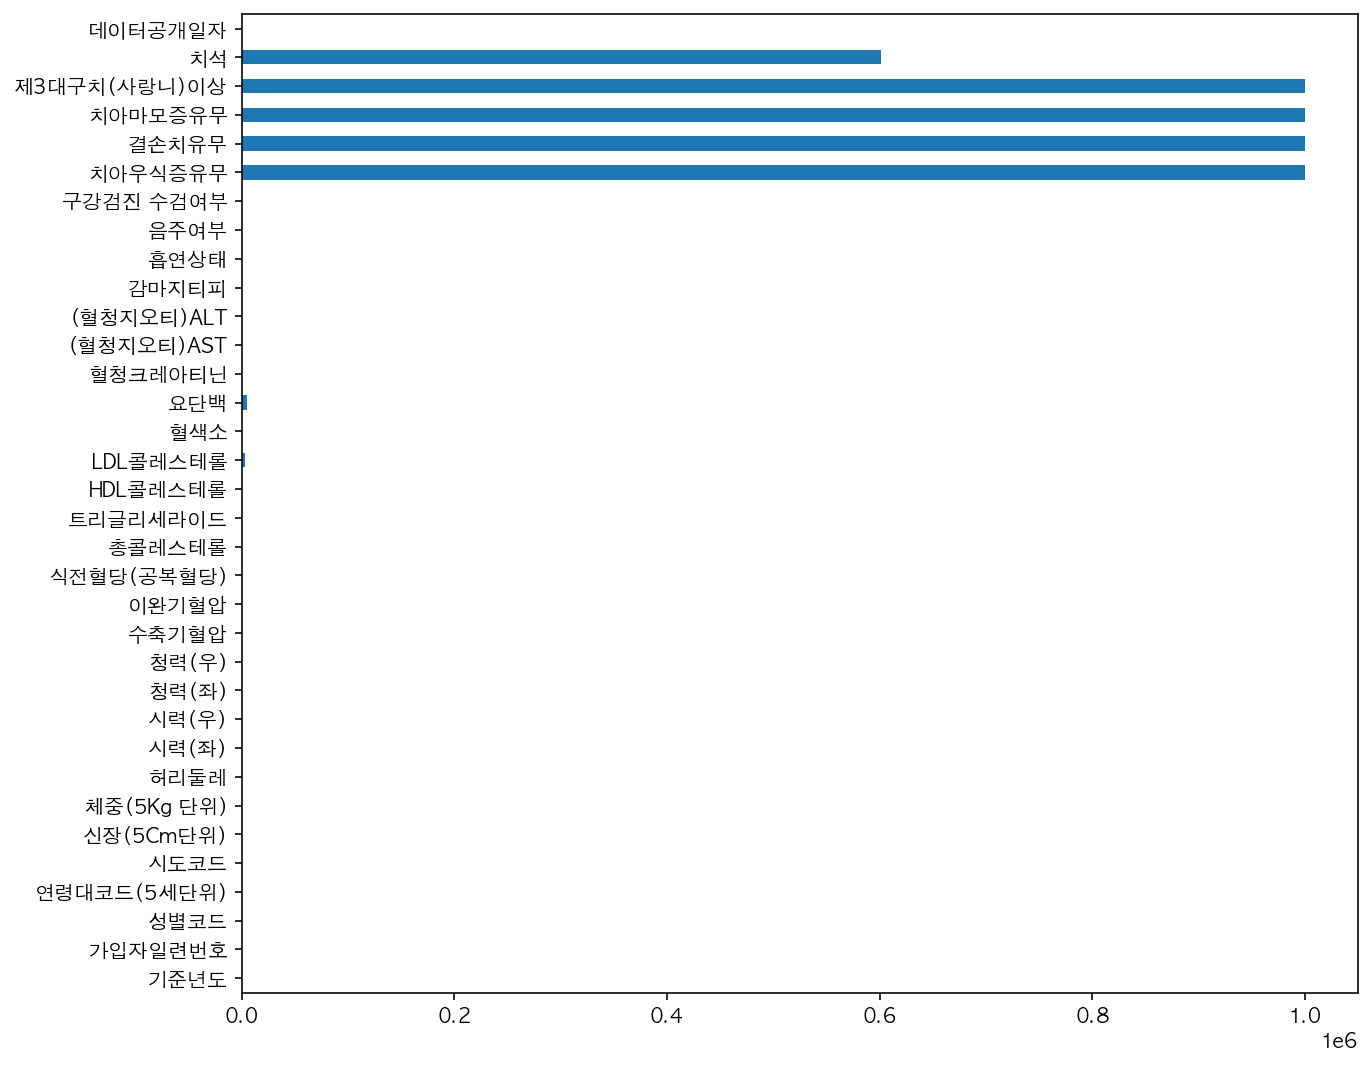

In [13]:
df.isnull().sum().plot.barh(figsize=(10, 9)) # 시각화

In [14]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head() # 특정 col값

(혈청지오티)ALT  (혈청지오티)AST
0        41.0        19.0
1        13.0        16.0
2        62.0        45.0
3        24.0        21.0
4        62.0        37.0

In [15]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999956 non-null  float64
 1   (혈청지오티)AST  999958 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [16]:
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999956.000000  999958.000000
mean       25.859343      26.075068
std        25.814268      24.437136
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        30.000000      28.000000
max      6710.000000    9999.000000

In [17]:
df['성별코드'].value_counts() # 성_코로 그룹화

1    531172
2    468828
Name: 성별코드, dtype: int64

In [18]:
df["흡연상태"].value_counts() # 흡연 그룹화

1.0    608587
3.0    215061
2.0    176192
Name: 흡연상태, dtype: int64

### 4-4

In [19]:
# groupby 그룹화 / value_counts -> series에 적합

df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(['음주여부', '성별코드'])['가입자일련번호'].count()

음주여부  성별코드
0.0   1       175150
      2       327579
1.0   1       355826
      2       140920
Name: 가입자일련번호, dtype: int64

In [21]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

In [22]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe() # info

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

In [23]:
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(
    ['count', 'mean', 'median']) # des중 부분만 

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [24]:
# pivot table
df.pivot_table(index='음주여부', values = '가입자일련번호', aggfunc='count')
# default = mean (aggfunc)

가입자일련번호
음주여부         
0.0    502729
1.0    496746

In [25]:
pd.pivot_table(df, index='음주여부', values = '감마지티피')

감마지티피
음주여부           
0.0   26.858541
1.0   47.745678

In [26]:
pd.pivot_table(df, index='음주여부', values = '감마지티피', 
               aggfunc = ['mean', 'median']) # aggfunc 여러개 설정 가능

mean median
          감마지티피  감마지티피
음주여부                  
0.0   26.858541   19.0
1.0   47.745678   30.0

In [27]:
pd.pivot_table(df, index=['성별코드', '음주여부'], values = '감마지티피', aggfunc = 'describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    0.0   18.0  25.0  38.0  175139.0  999.0  34.710544  1.0  37.715218
     1.0   24.0  37.0  63.0  355819.0  999.0  56.707919  1.0  69.039084
2    0.0   13.0  17.0  24.0  327559.0  999.0  22.660238  1.0  25.181300
     1.0   13.0  17.0  25.0  140913.0  999.0  25.115149  1.0  35.870812

### 4-5

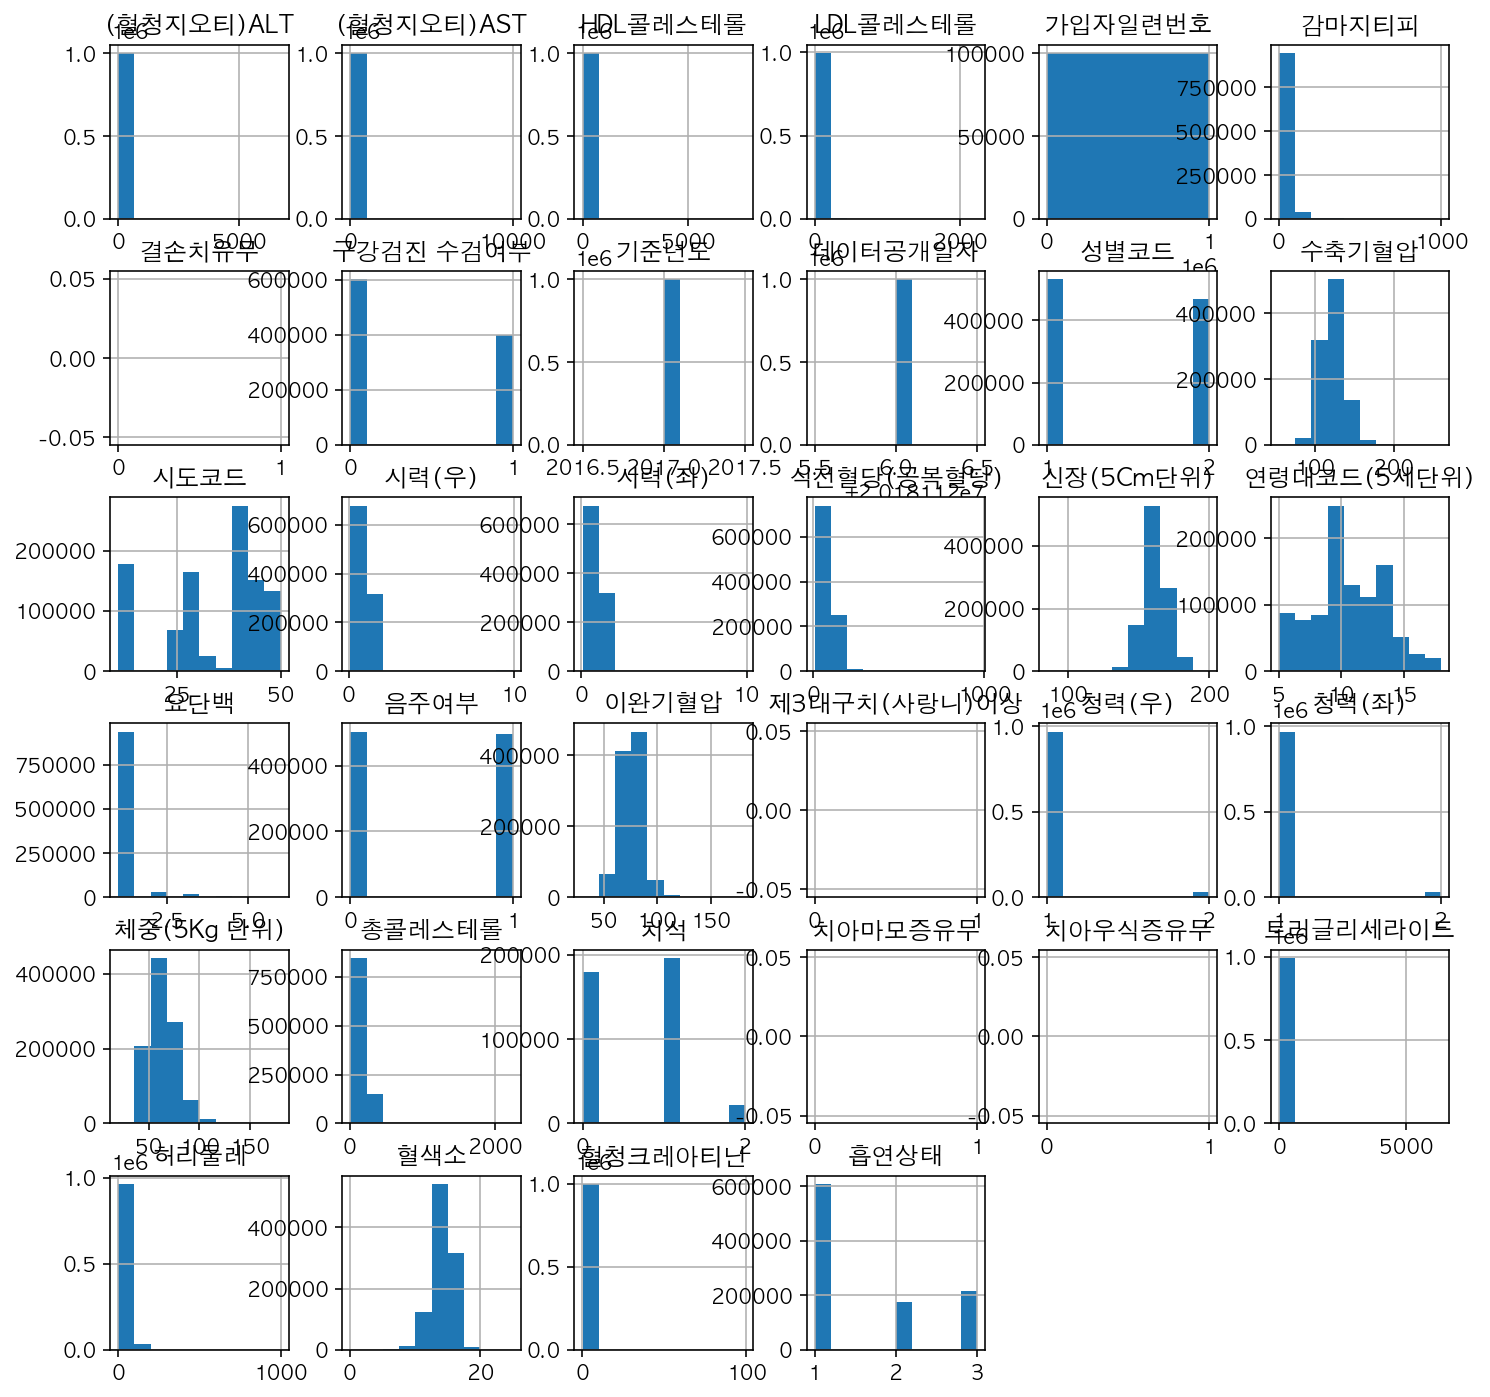

In [28]:
# 히스토그램
# 100만개 이상 데이터는 seaborn 가급적 x -> 느릴수도

h = df.hist(figsize = (12, 12))

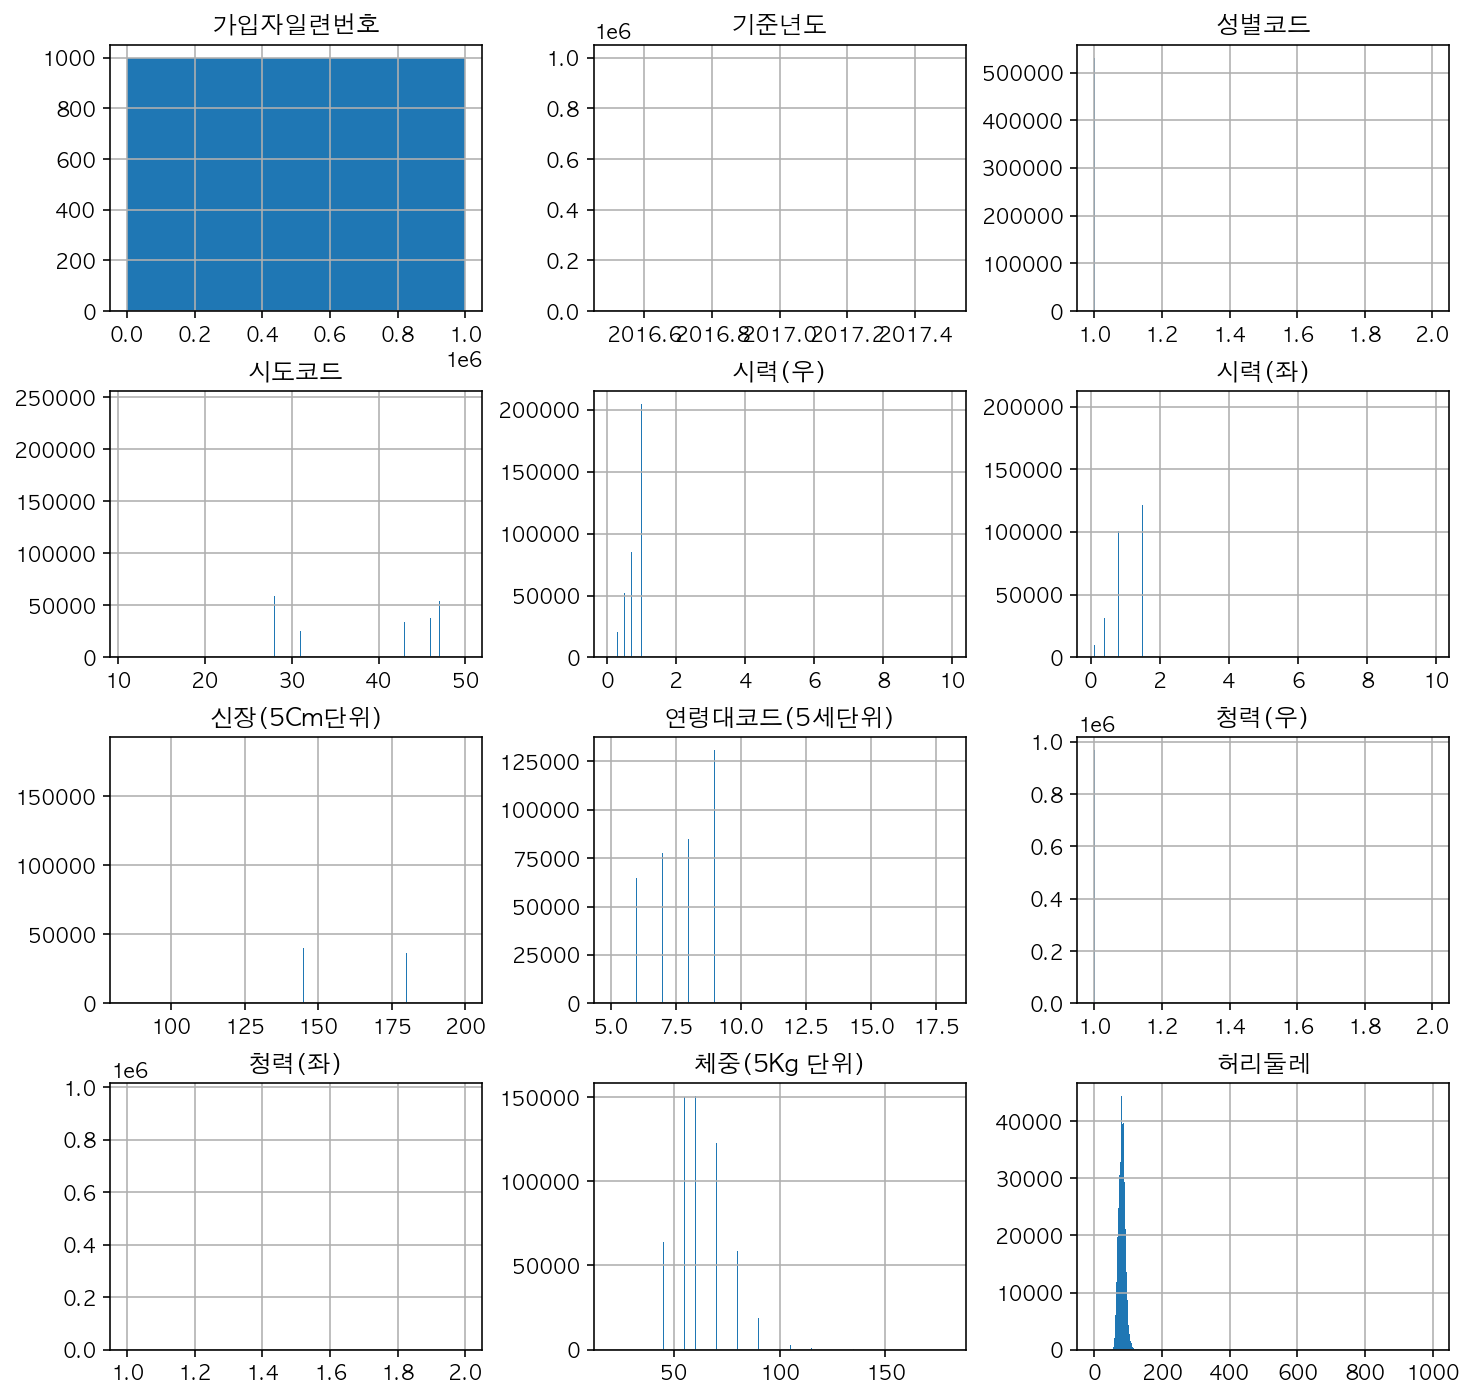

In [29]:
h = df.iloc[:, :12].hist(figsize = (12, 12), bins = 1000)

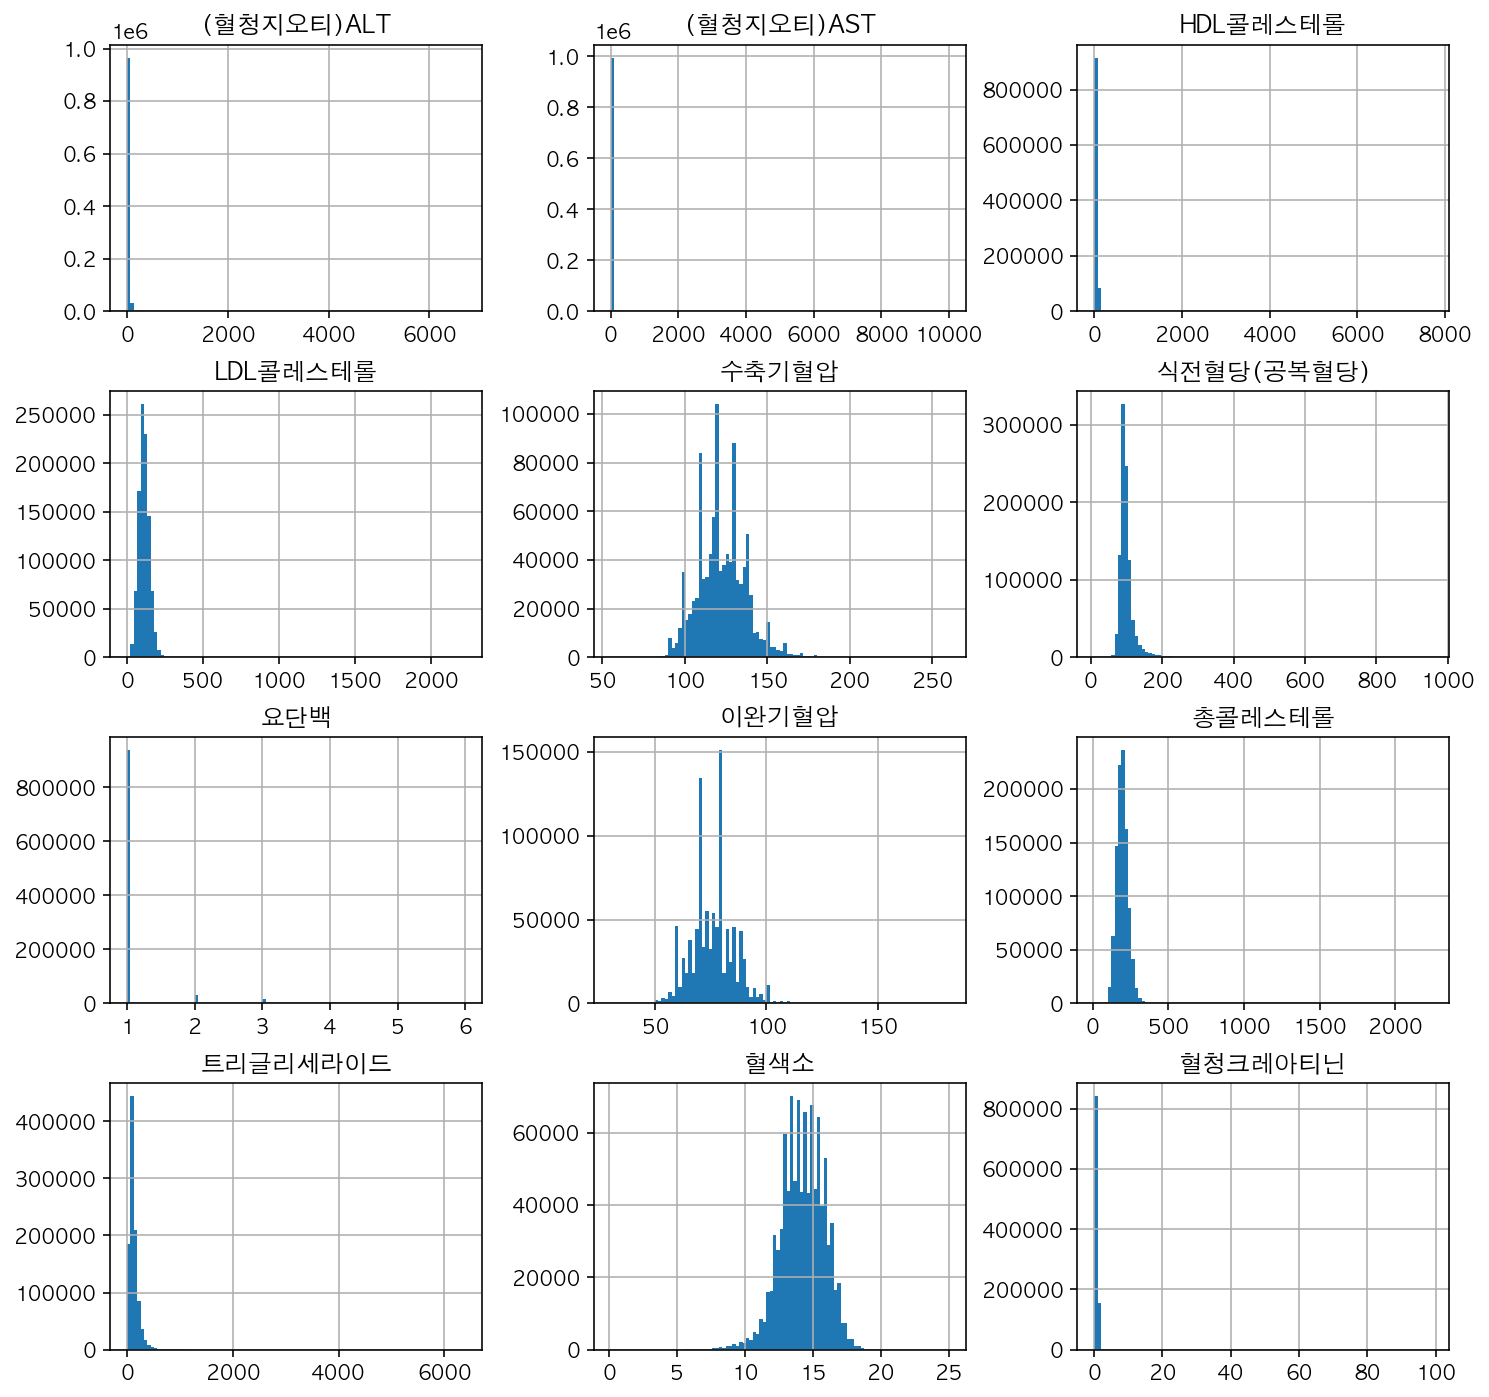

In [30]:
h = df.iloc[:, 12:24].hist(figsize = (12, 12), bins = 100)#bin = 막대 두께-

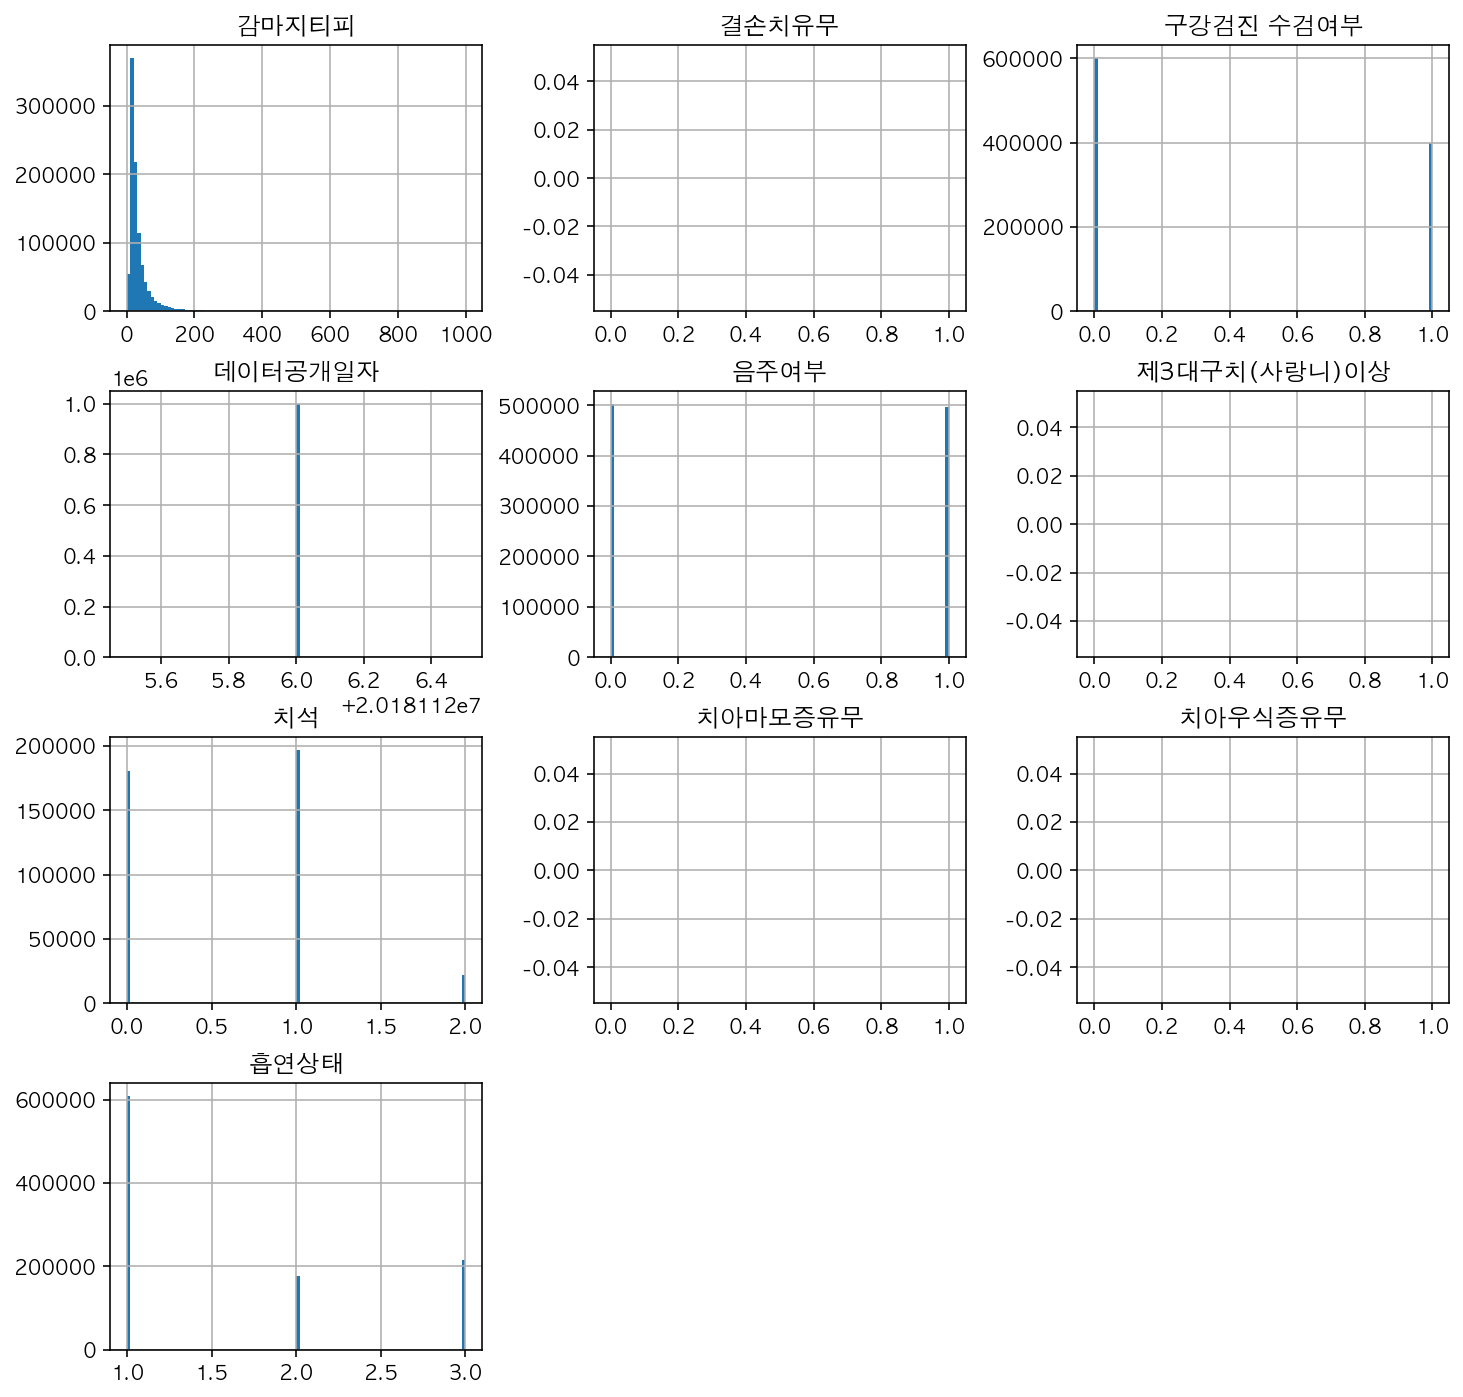

In [31]:
h = df.iloc[:, 24:].hist(figsize = (12, 12), bins = 100)

### 4.6

In [32]:
df_sample = df.sample(1000, random_state = 1) # r_s = 1 -> 항상 같은 값
# seaborn -> 전체 데이터 오래걸림 random 1000개만
df_sample.shape

(1000, 34)

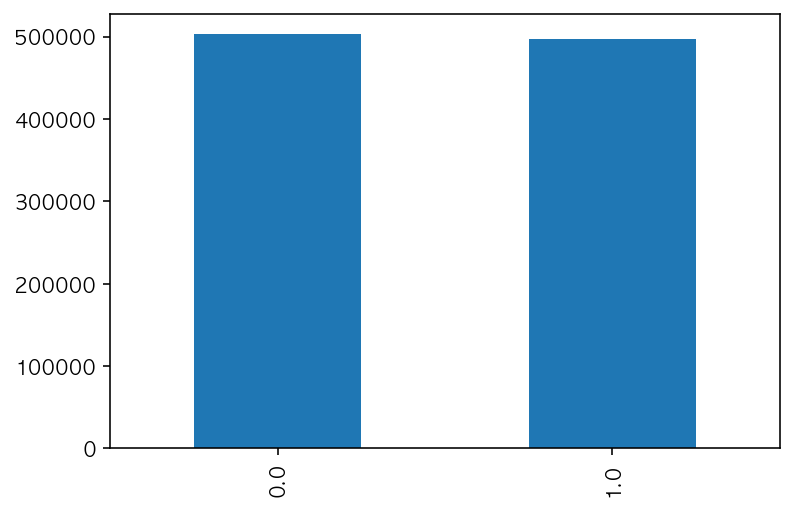

In [33]:
# 범주형 데이터 - 문자

df['음주여부'].value_counts().plot.bar()

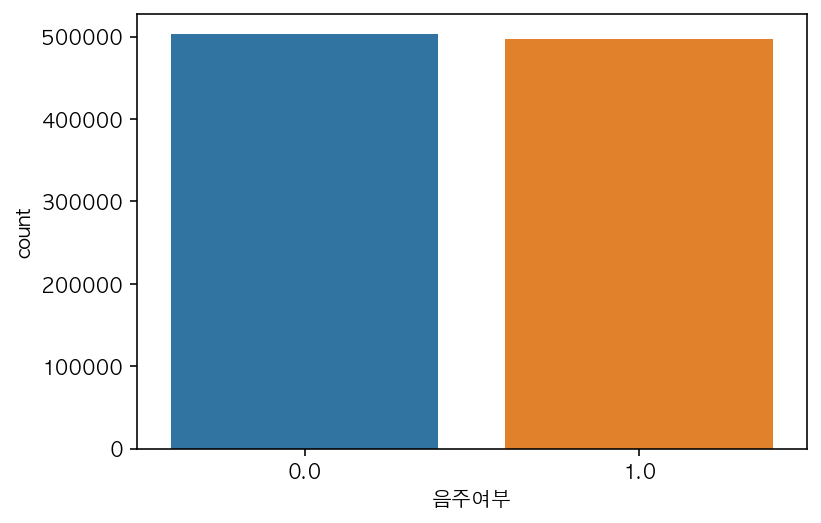

In [34]:
sns.countplot(x = '음주여부',data = df) # x축 설정

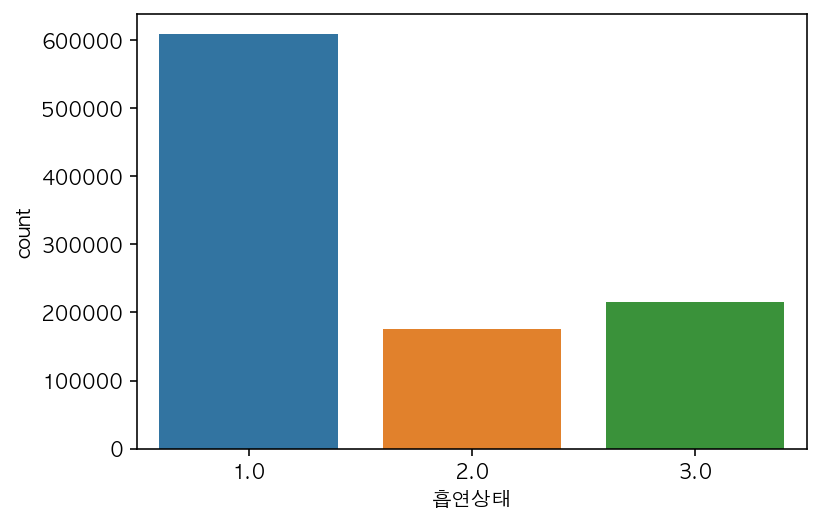

In [35]:
sns.countplot(x = '흡연상태',data = df) # x축 설정

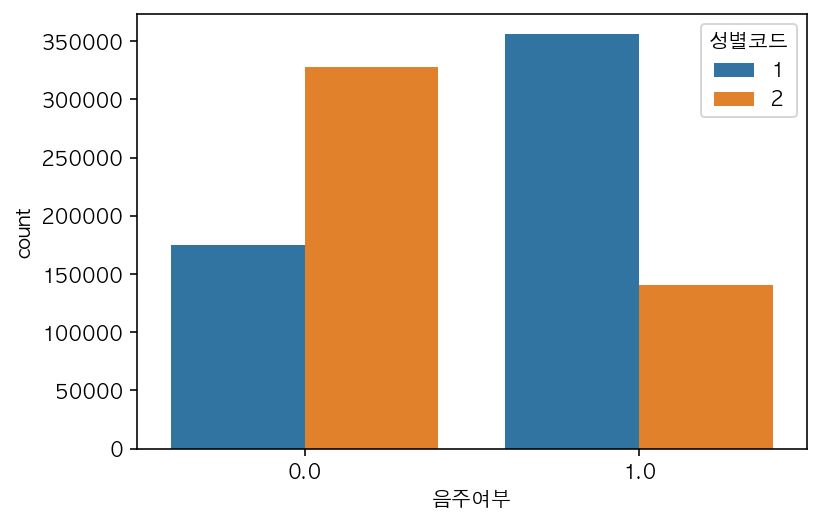

In [36]:
sns.countplot(x = '음주여부',data = df, hue = '성별코드') # x축 설정
# hue / groupby랑 비슷
# 음주여부별 성별

sns.set(font_scale = 1, font = "AppleGothic")

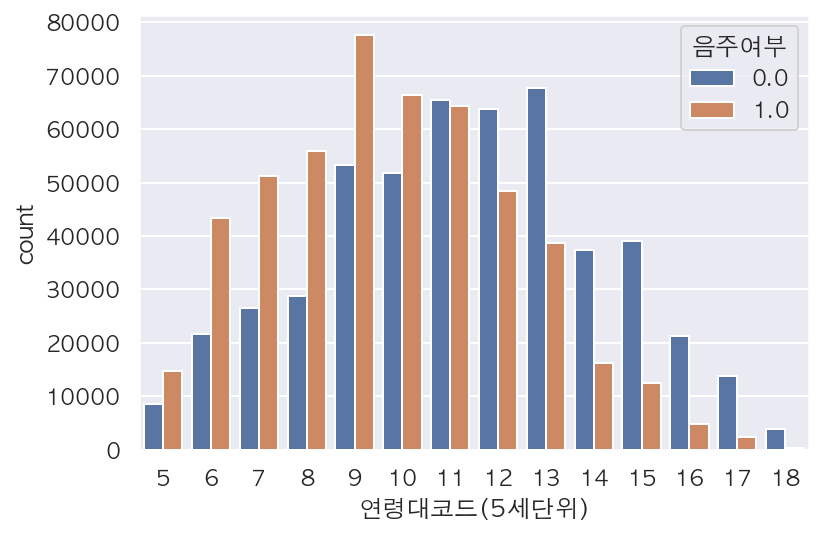

In [37]:
sns.countplot(x = '연령대코드(5세단위)', data = df, hue = '음주여부')

# 연령대별 음주여부 

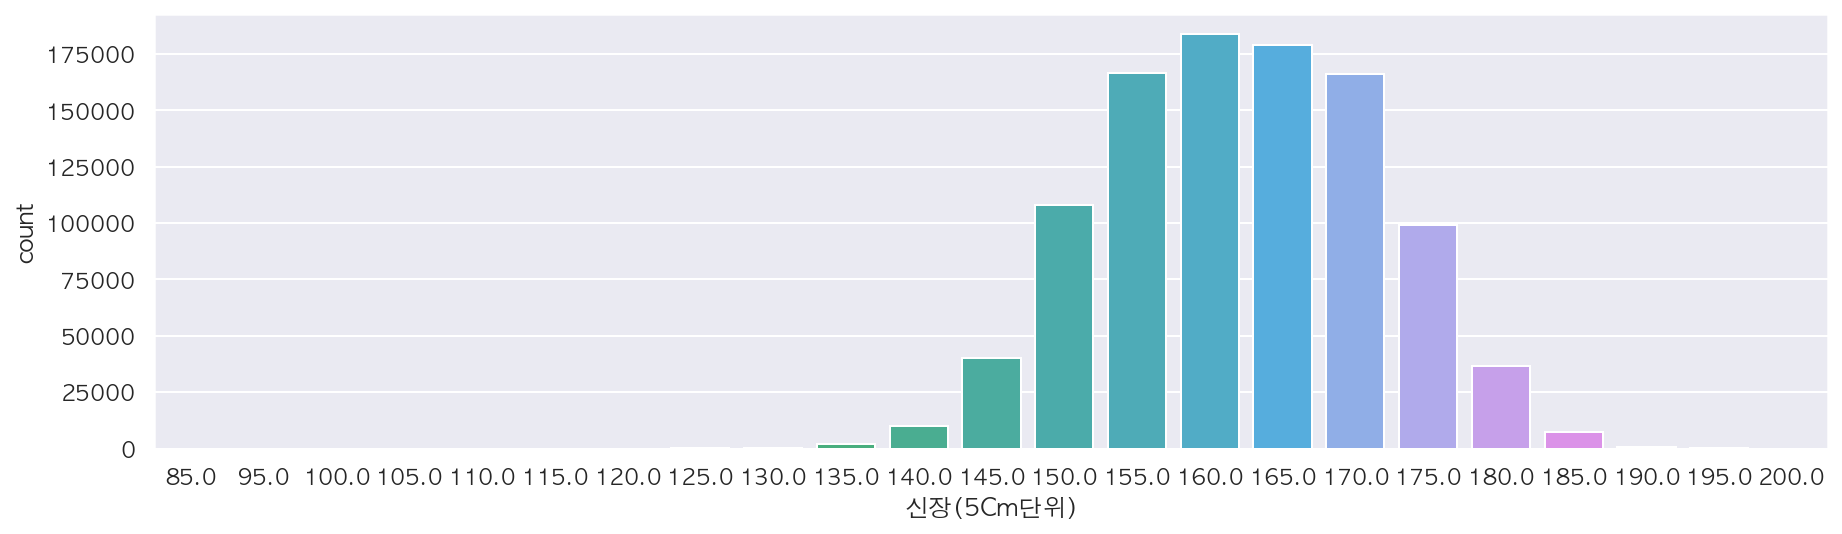

In [38]:
plt.figure(figsize = (15, 4)) # mat plt 사이즈 변경

sns.countplot(x = '신장(5Cm단위)', data = df)

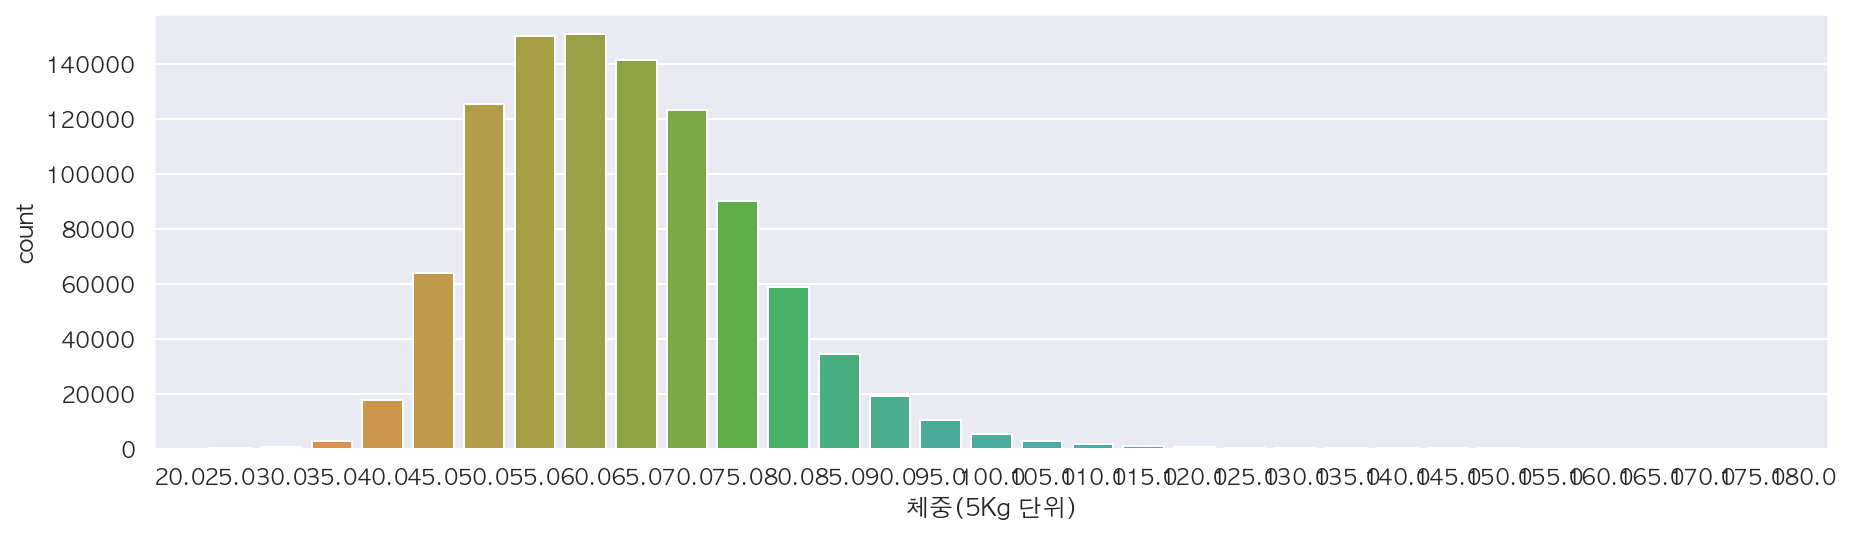

In [39]:
plt.figure(figsize = (15, 4)) # mat plt 사이즈 변경
sns.countplot(data = df, x = '체중(5Kg 단위)')

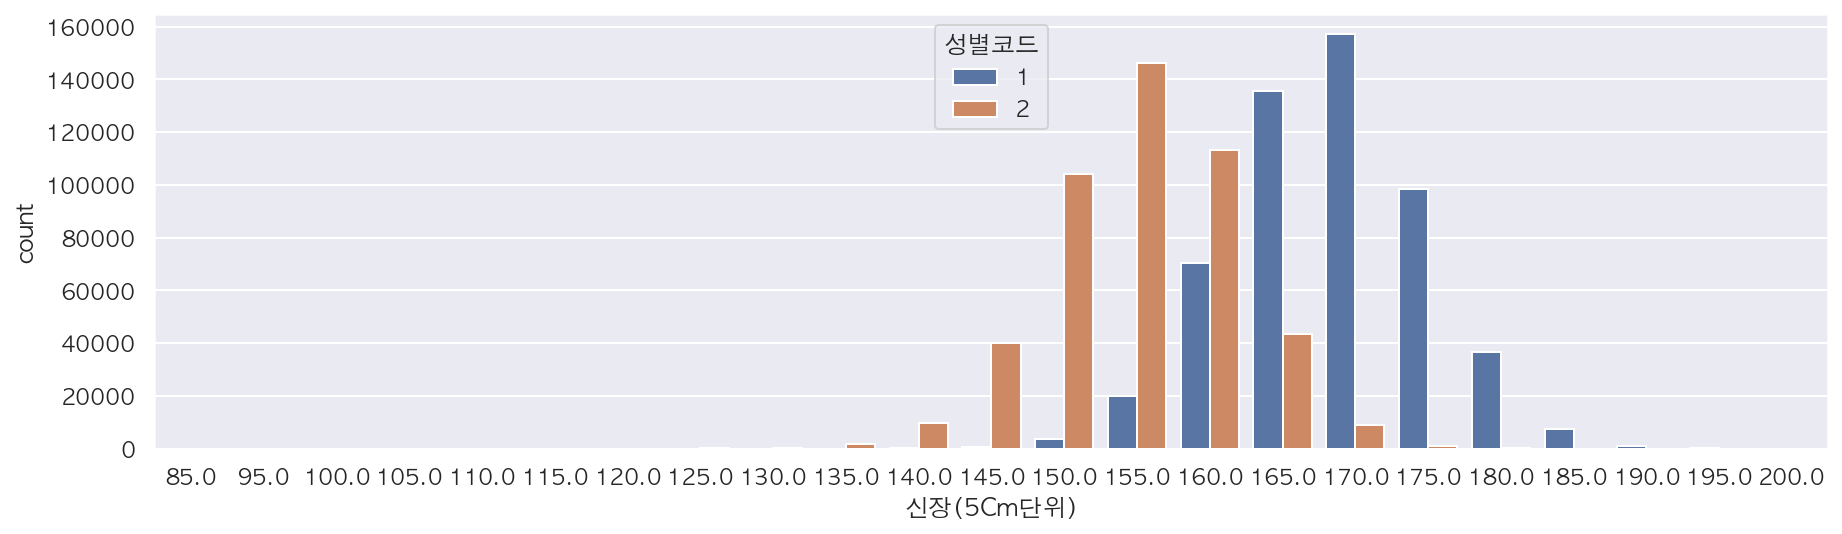

In [40]:
plt.figure(figsize = (15, 4)) # mat plt 사이즈 변경
sns.countplot(data = df, x = '신장(5Cm단위)', hue = '성별코드')

# 신장별 성별

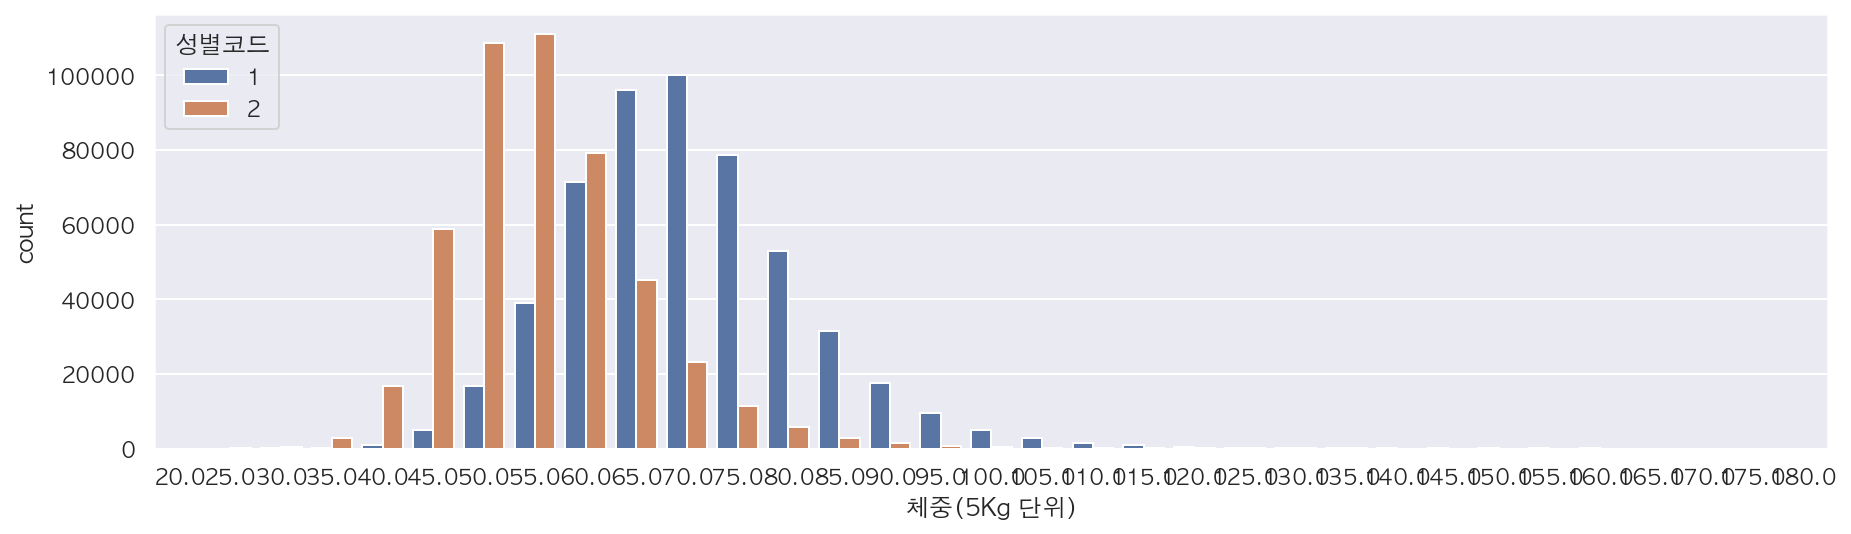

In [41]:
plt.figure(figsize = (15, 4)) # mat plt 사이즈 변경
sns.countplot(data = df, x = '체중(5Kg 단위)', hue = '성별코드')

# 체중별 성별

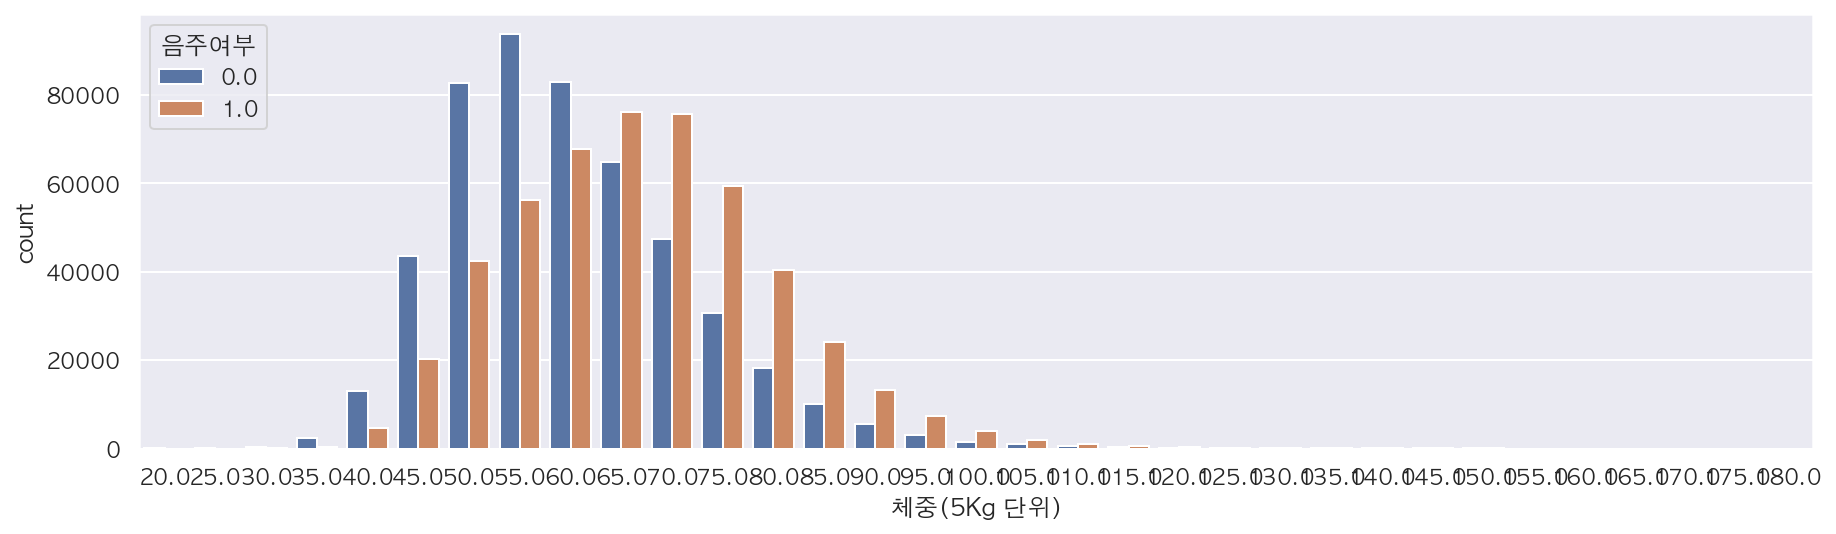

In [42]:
plt.figure(figsize = (15, 4)) # mat plt 사이즈 변경
sns.countplot(data = df, x = '체중(5Kg 단위)', hue = '음주여부')

# 체중별 음주여부

### 4.7

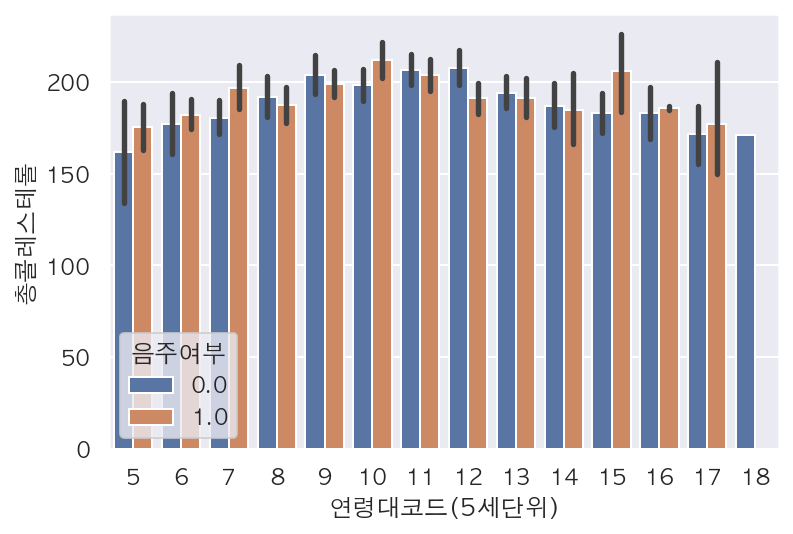

In [43]:
# barplot
sns.barplot(data = df_sample, x = '연령대코드(5세단위)', y = '총콜레스테롤', hue = '음주여부') # 오래걸림 - df_sample로
# 연령대 기준으로 총콜레스테롤 음주여부에 따라
# bar위에 검은줄 = 신뢰구간

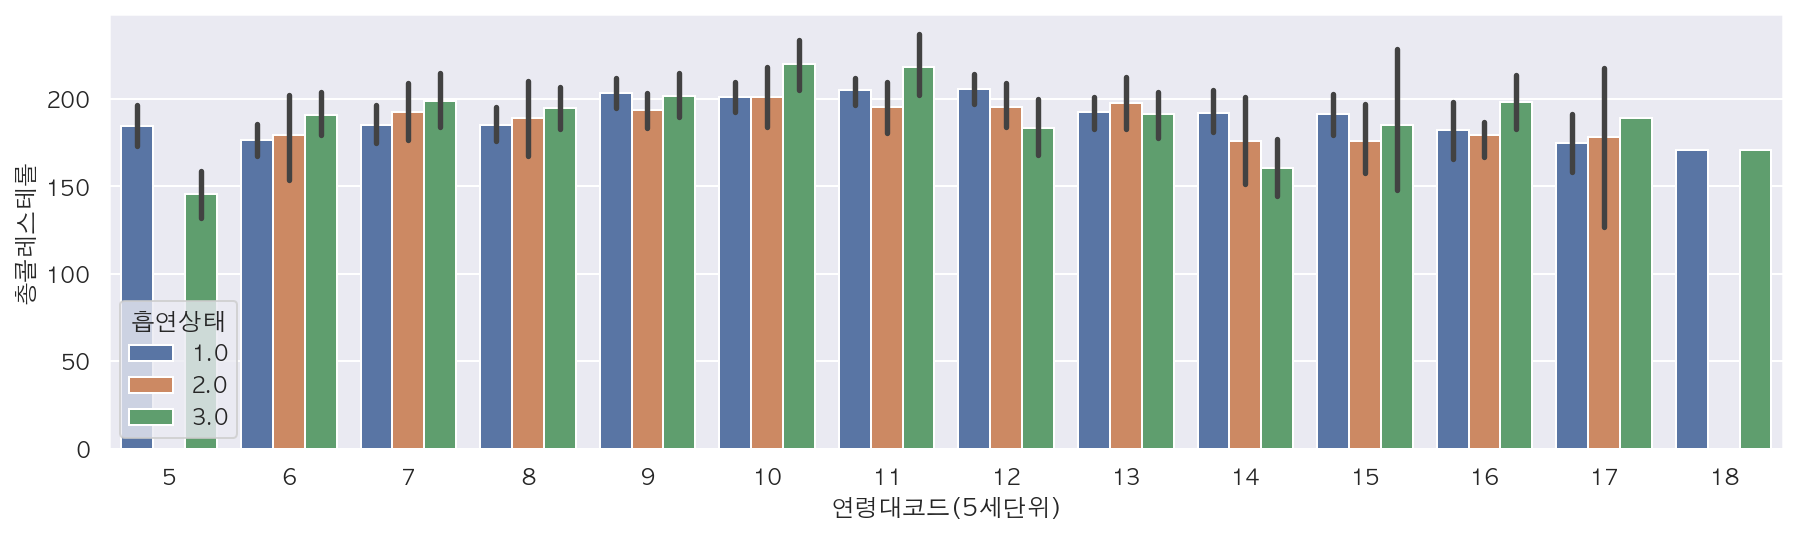

In [44]:
plt.figure(figsize = (15, 4))
sns.barplot(data = df_sample, x = '연령대코드(5세단위)', y = '총콜레스테롤', hue = '흡연상태')


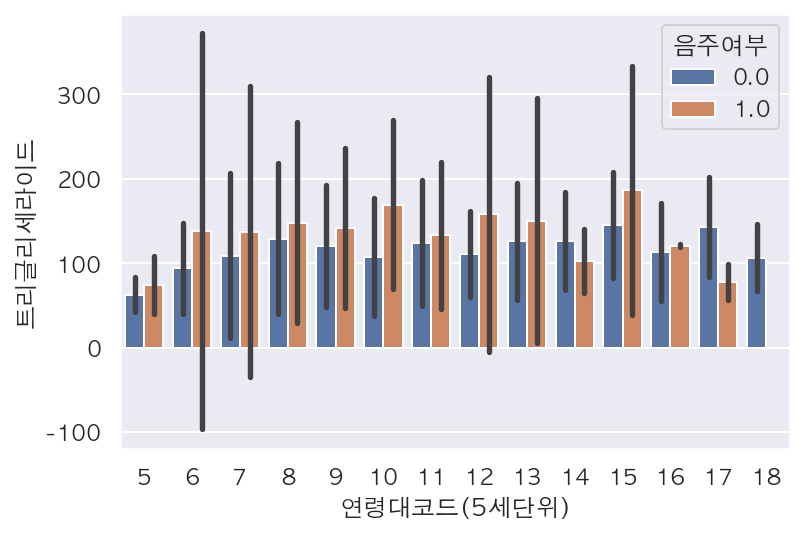

In [45]:
sns.barplot(data = df_sample, x = '연령대코드(5세단위)', y = '트리글리세라이드', hue = '음주여부', ci = 'sd') 
# ci = 신뢰구간(default = 95) -> sd = 표준편차 / 6 -> 표준편차 큼 -> sample이라


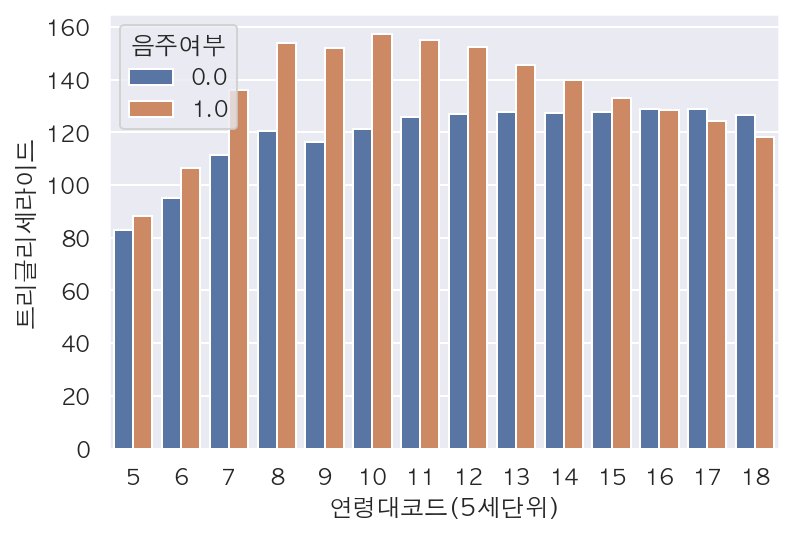

In [46]:
sns.barplot(data = df, x = '연령대코드(5세단위)', y = '트리글리세라이드', hue = '음주여부', ci = None) 


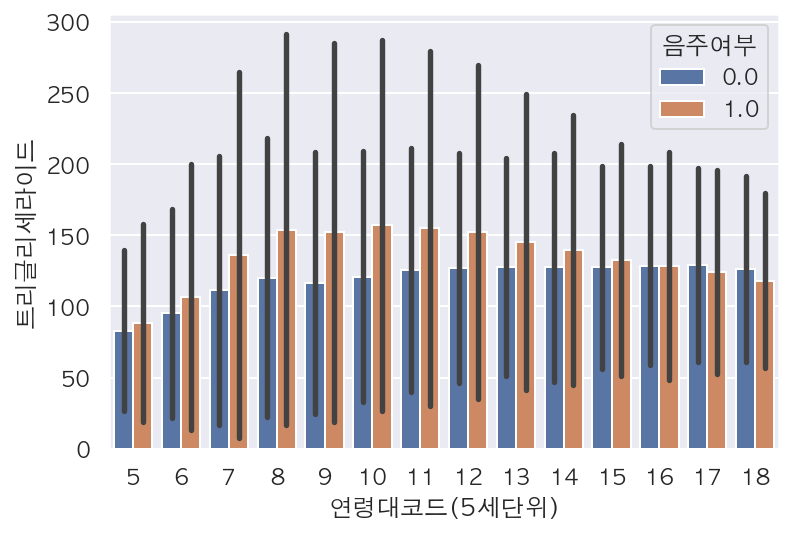

In [47]:
sns.barplot(data = df, x = '연령대코드(5세단위)', y = '트리글리세라이드', hue = '음주여부', ci = 'sd') 


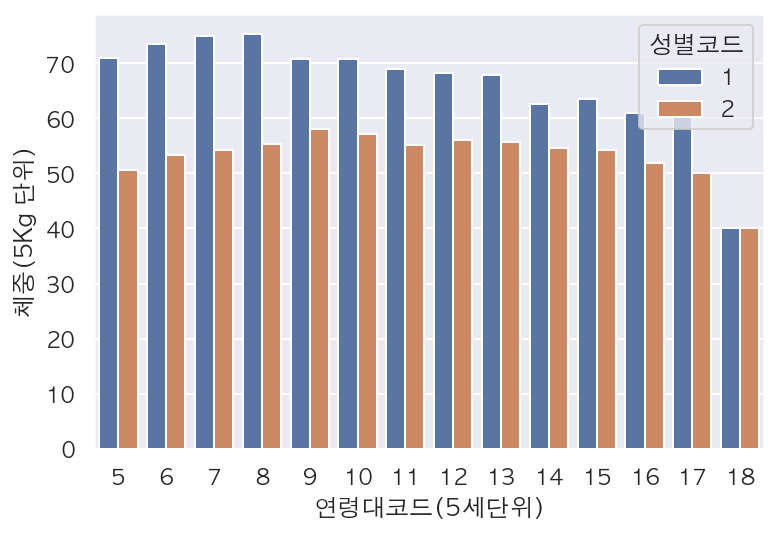

In [48]:
sns.barplot(data = df_sample, x = '연령대코드(5세단위)', y = '체중(5Kg 단위)', hue = '성별코드', ci = None) 
# 연령대별 체중 성별에 따라

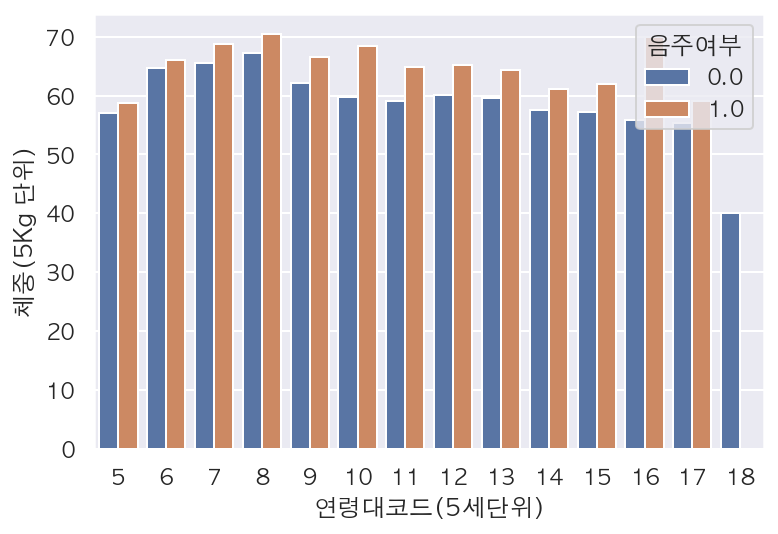

In [49]:
sns.barplot(data = df_sample, x = '연령대코드(5세단위)', y = '체중(5Kg 단위)', hue = '음주여부', ci = None) 
# 연령대별 체중 음주여부에 따라

### 4.8

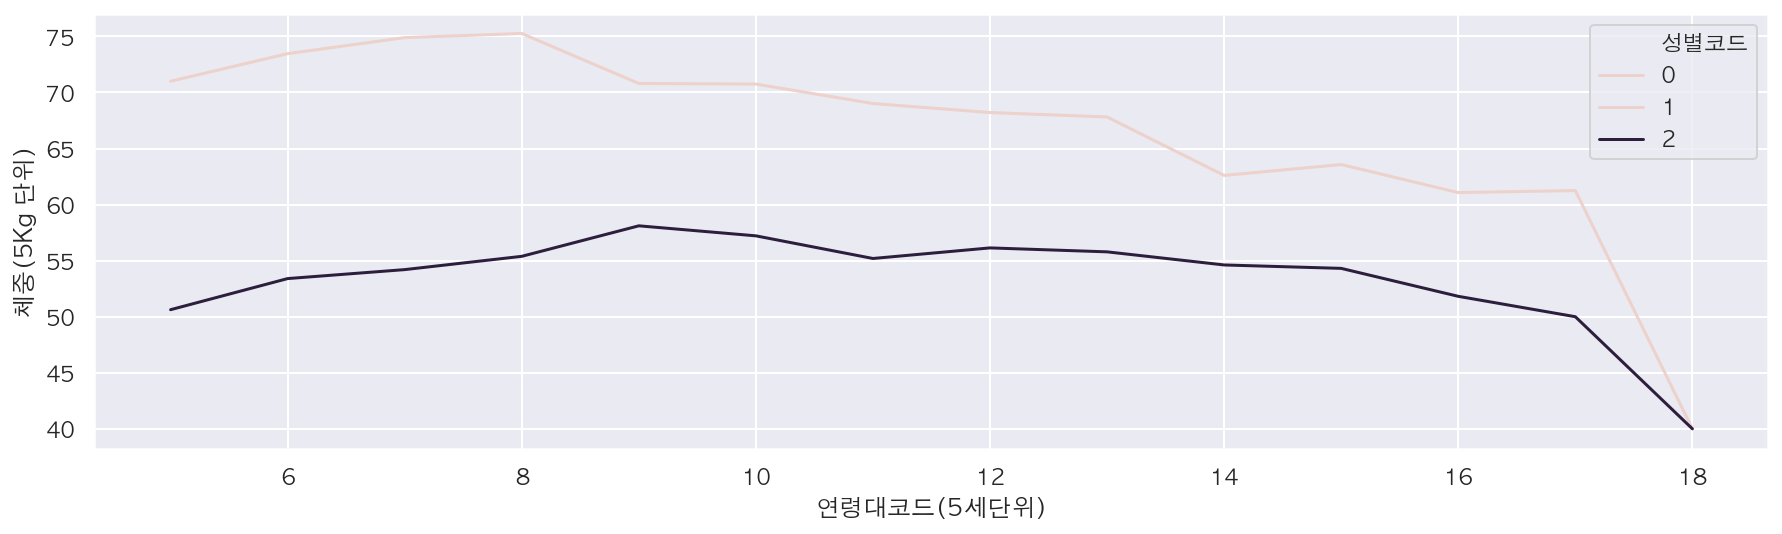

In [50]:
# lineplot / pointplot

# barplot이랑 코드는 비슷
plt.figure(figsize = (15, 4))
sns.lineplot(data = df_sample, x = '연령대코드(5세단위)', y = '체중(5Kg 단위)', hue = '성별코드', ci = None) 


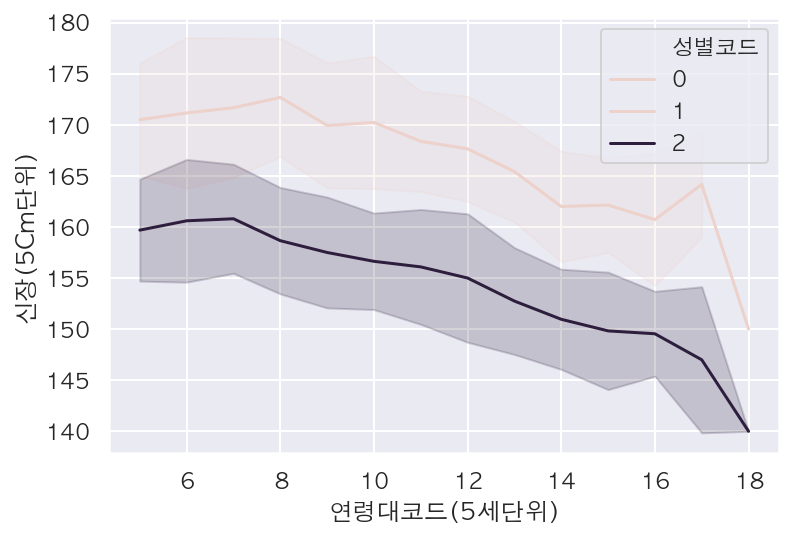

In [51]:
sns.lineplot(data = df_sample, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', ci = 'sd') 

# 연령에 따른 신장 성별에 따라

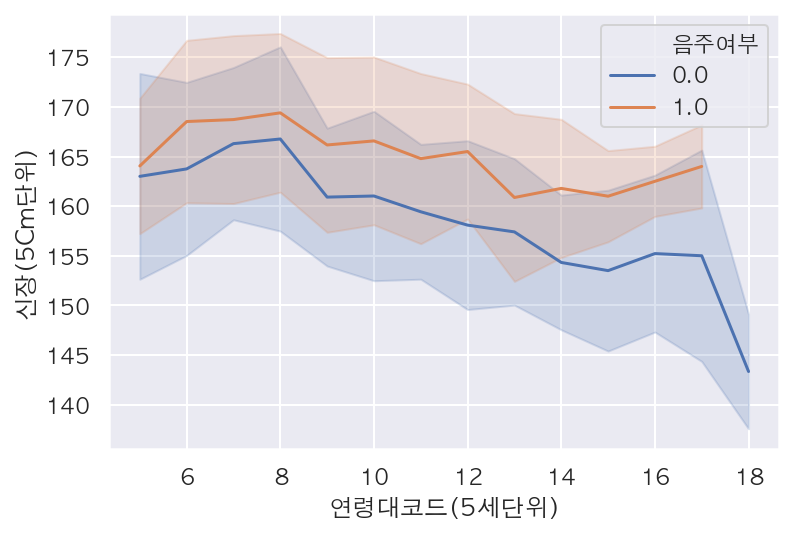

In [52]:
sns.lineplot(data = df_sample, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '음주여부', ci = 'sd') 


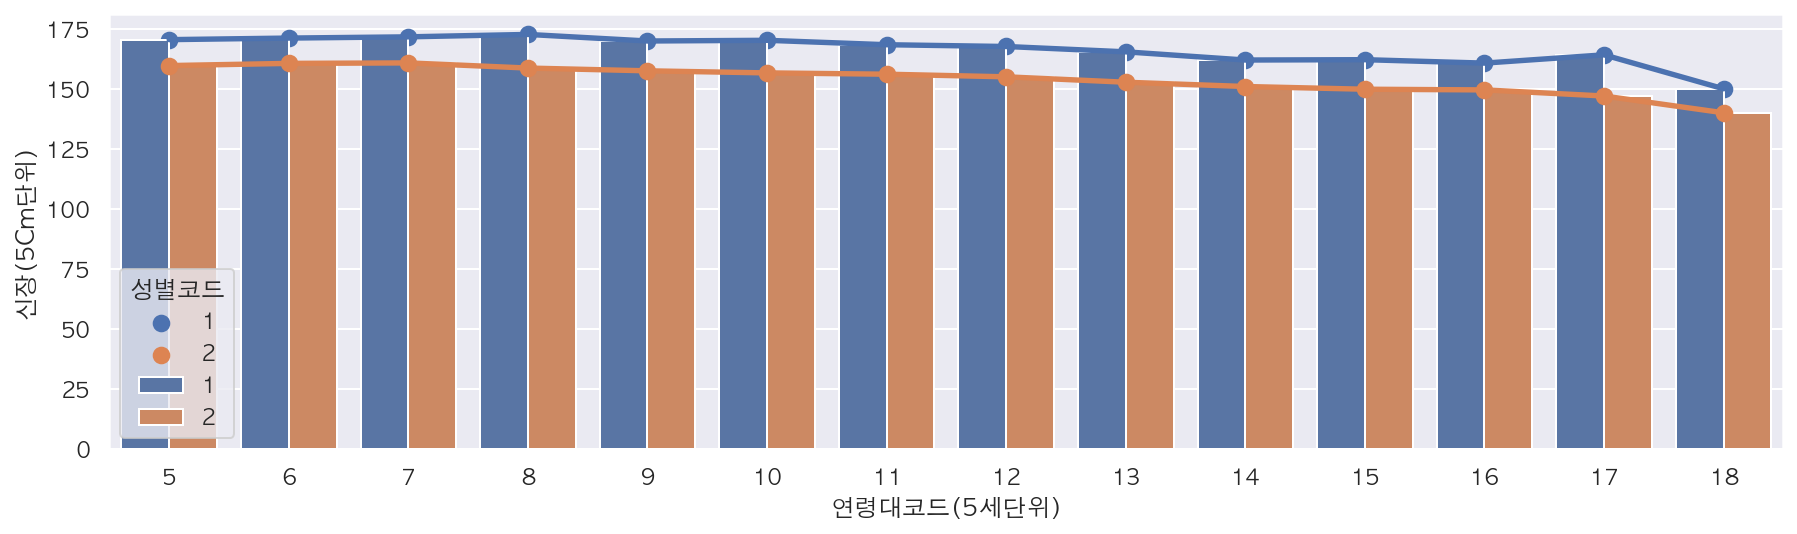

In [53]:
plt.figure(figsize = (15, 4))
sns.barplot(data = df_sample, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', ci = None) 
sns.pointplot(data = df_sample, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', ci = None) 

# 겹쳐서도 가능


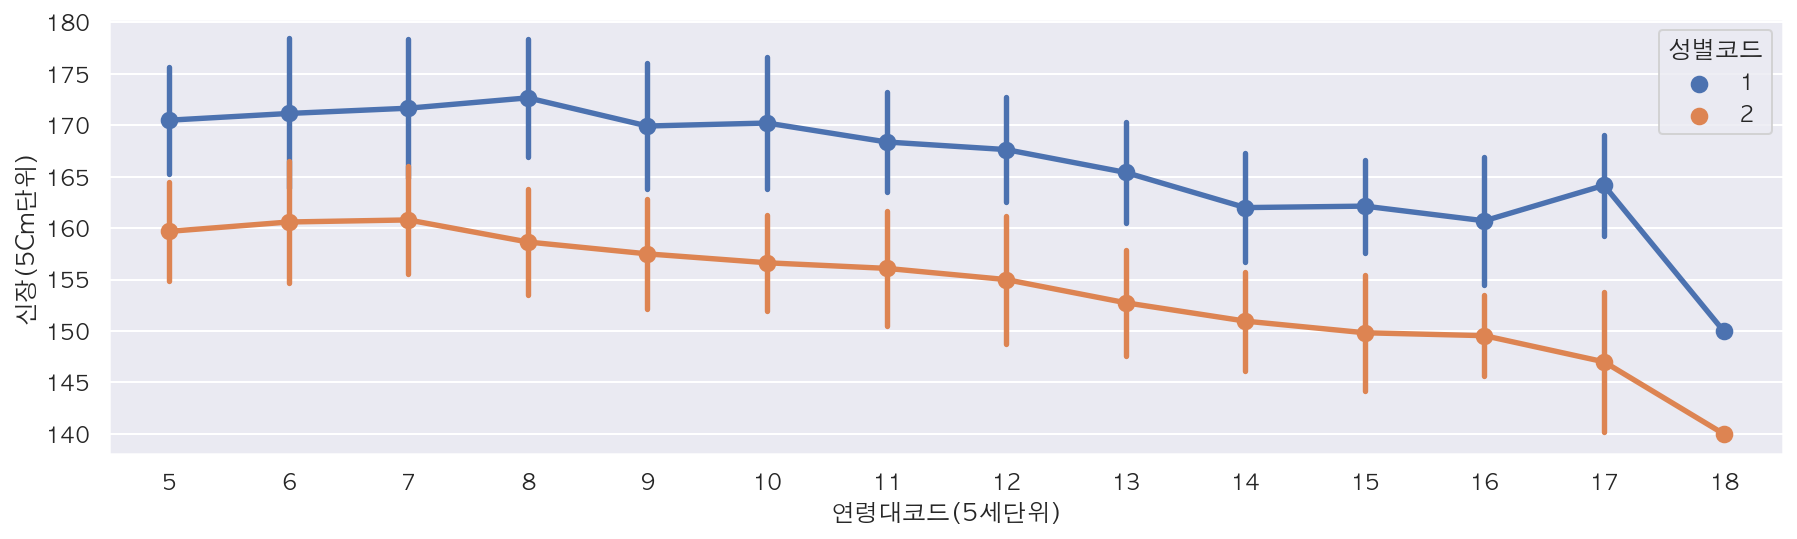

In [54]:
plt.figure(figsize = (15, 4))
sns.pointplot(data = df_sample, x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', ci = 'sd') 


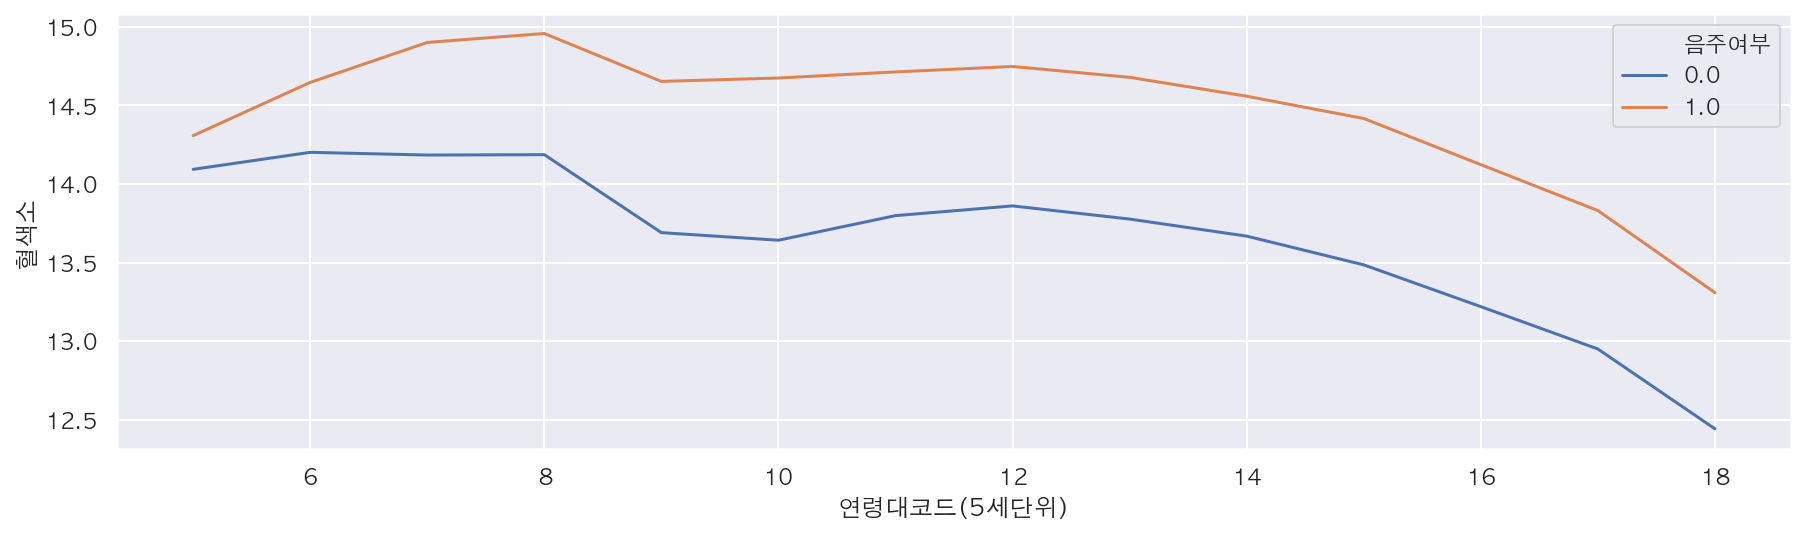

In [55]:
plt.figure(figsize = (15, 4))
sns.lineplot(data = df, x = '연령대코드(5세단위)', y = '혈색소', hue = '음주여부', ci = None)

### 4.9

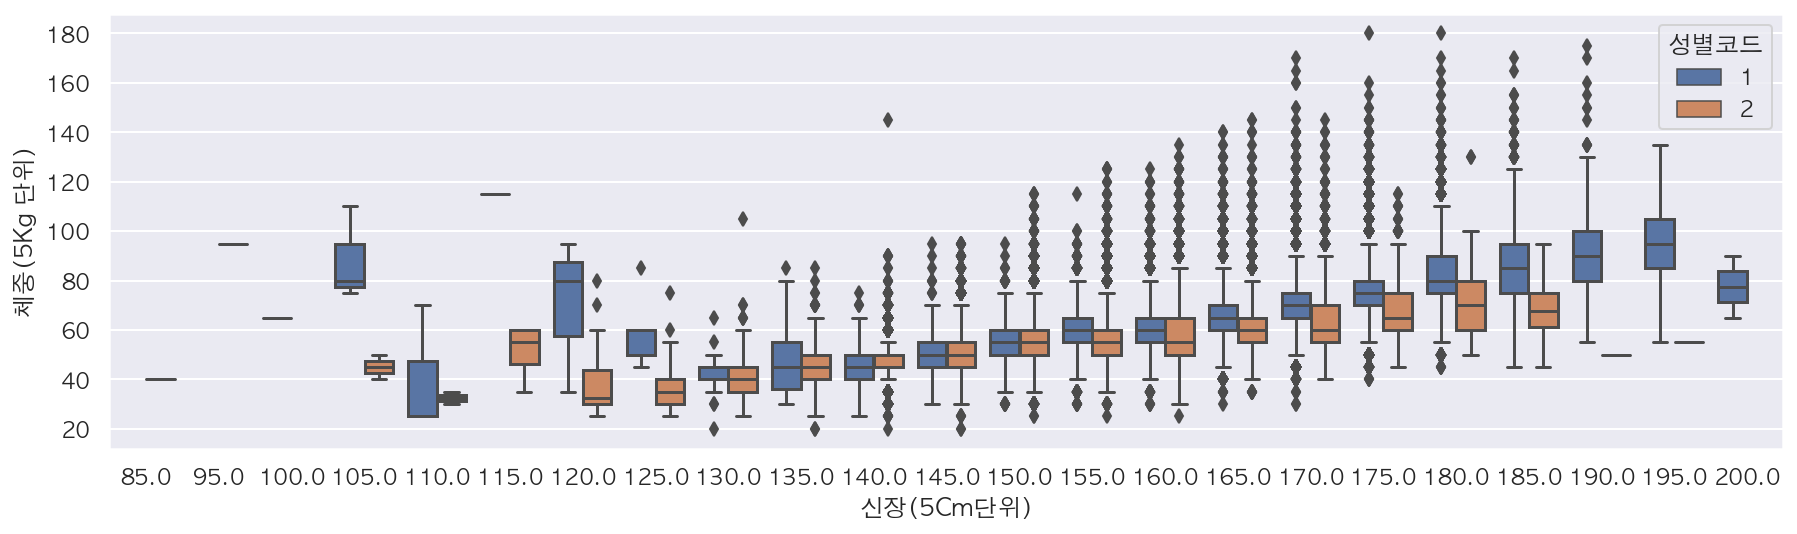

In [56]:
# boxplot, violinplot, swarmplot, lmplot
# 1~3 사분위 수 최소/최대값 알기 좋음 - boxplot

plt.figure(figsize = (15, 4))
sns.boxplot(data = df, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '성별코드')
#85 ~ 100 데이터 적어서 -- 표시

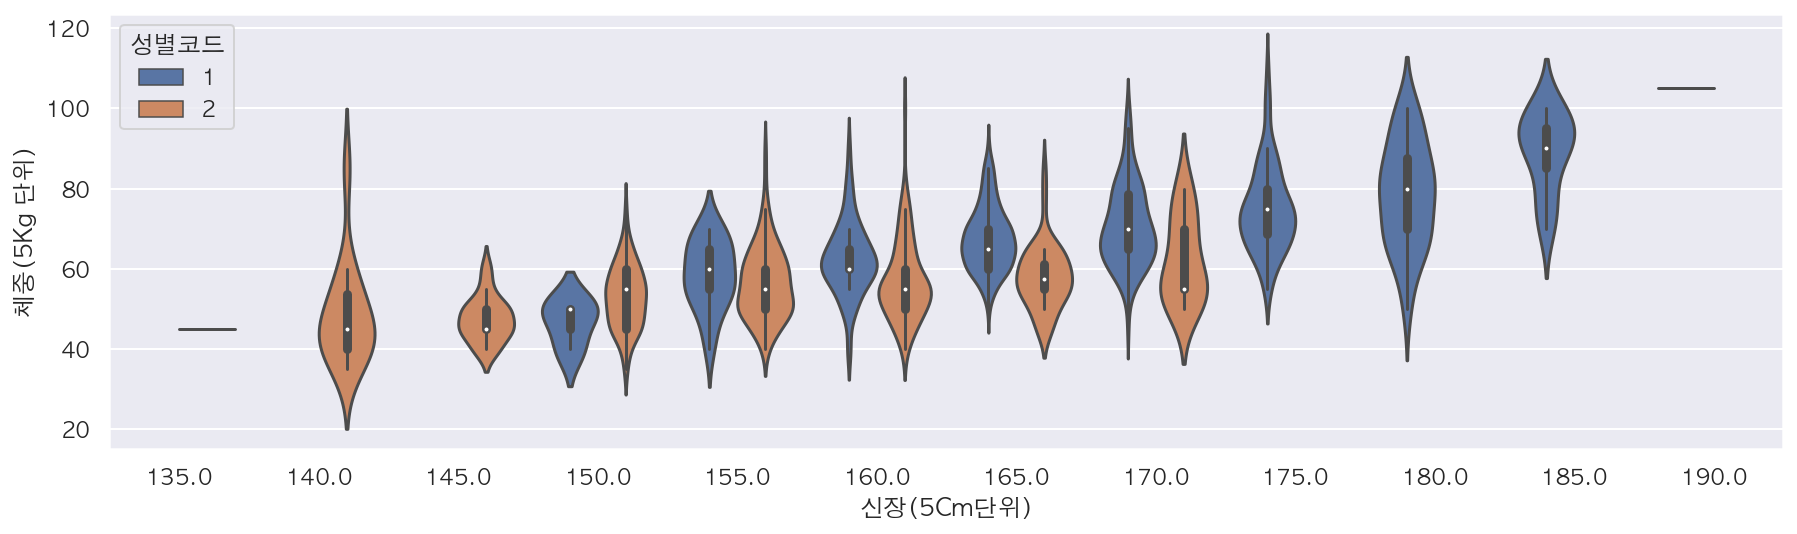

In [57]:
# violinplot
plt.figure(figsize = (15, 4))
sns.violinplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '성별코드')


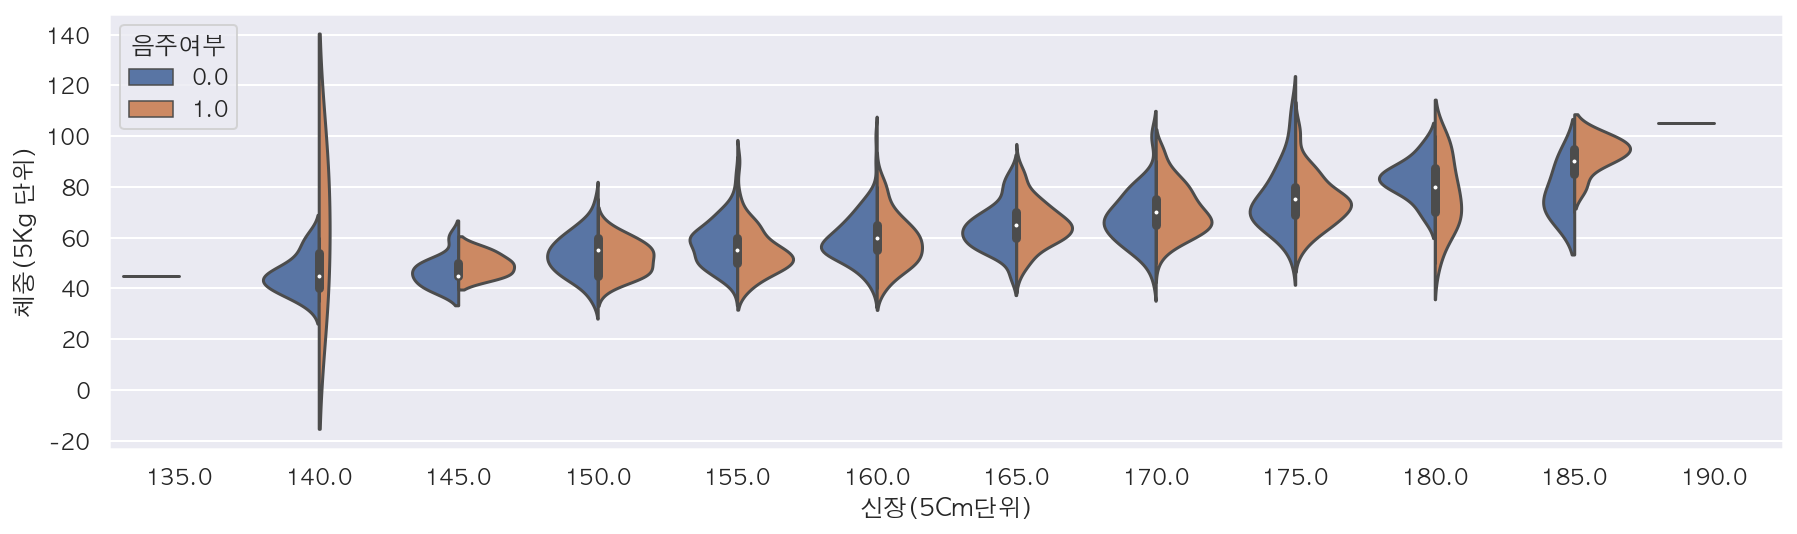

In [58]:
plt.figure(figsize = (15, 4))
sns.violinplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '음주여부', split = True)

# split = 2개의 (hue) 값을 하나의 그래프에


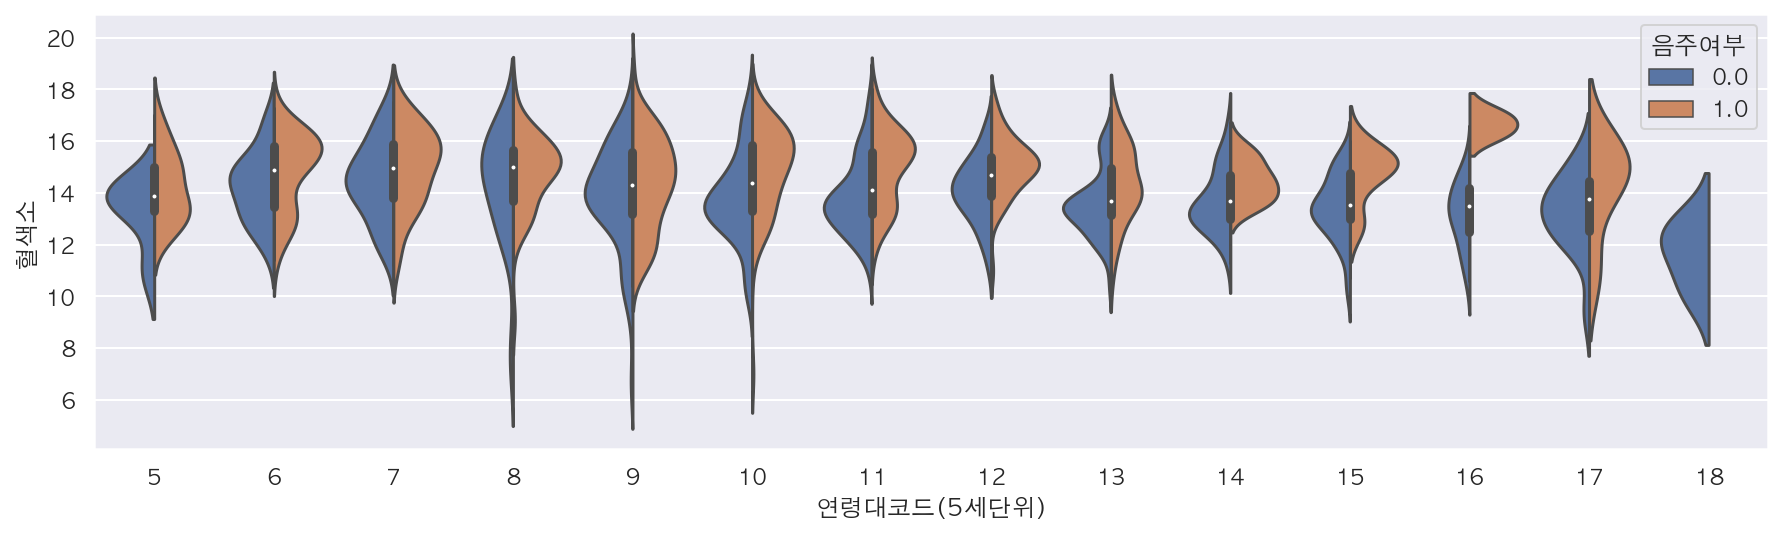

In [59]:
plt.figure(figsize = (15, 4))
sns.violinplot(data = df_sample, x = '연령대코드(5세단위)', y = '혈색소', hue = '음주여부', split = True)

# violin = box보다 더 세밀하게

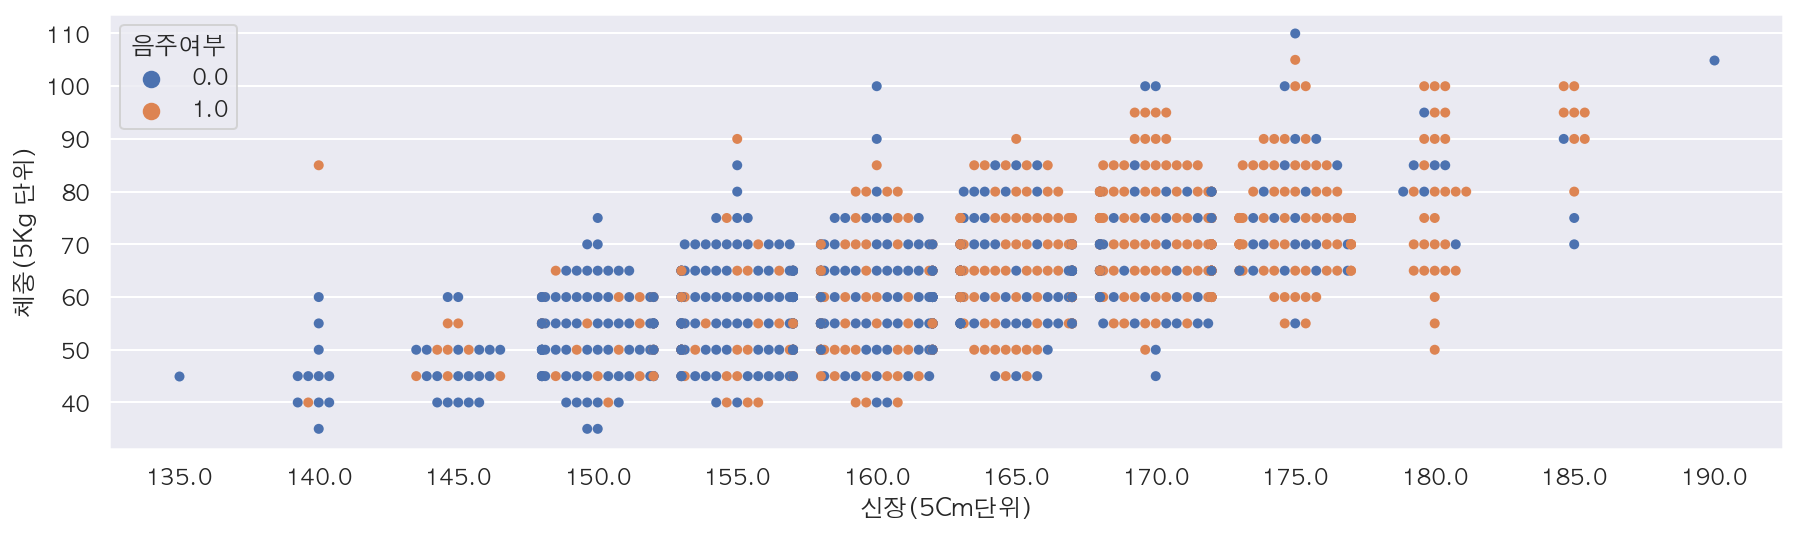

In [60]:
plt.figure(figsize = (15, 4))
sns.swarmplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '음주여부')

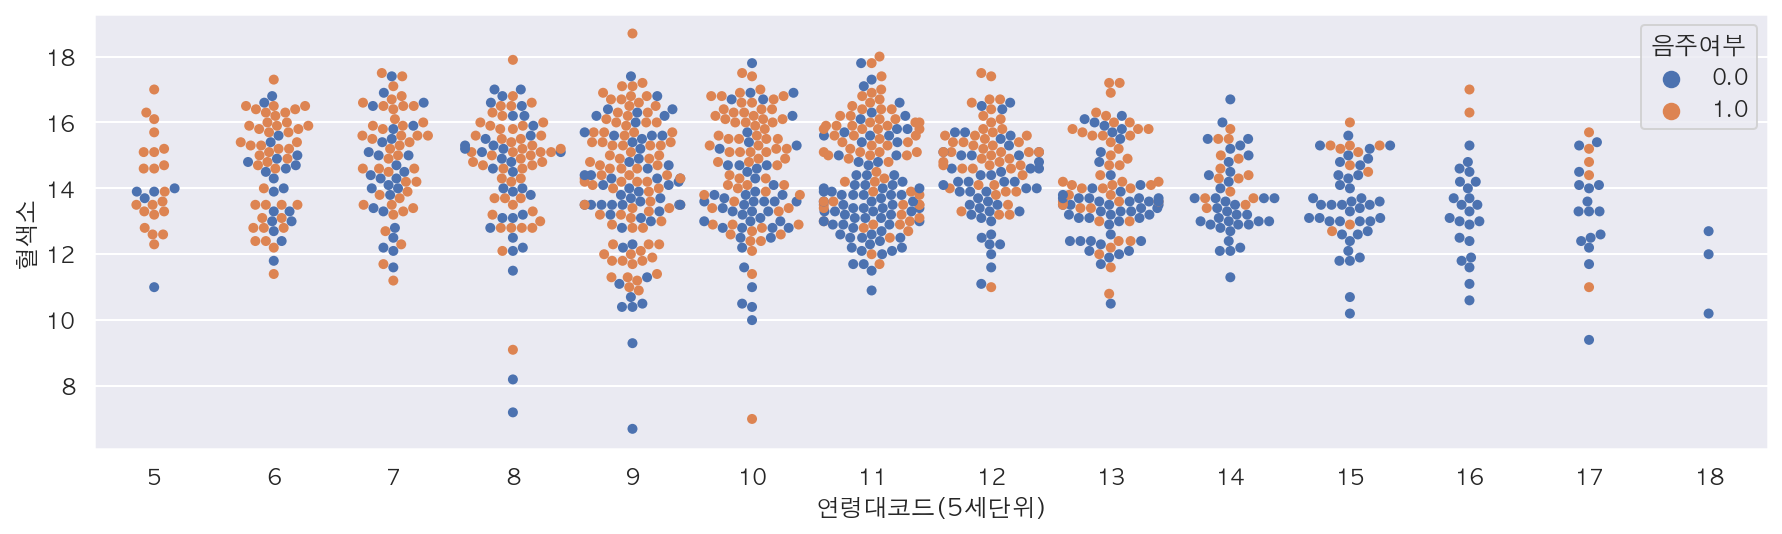

In [61]:
plt.figure(figsize = (15, 4))
sns.swarmplot(data = df_sample, x = '연령대코드(5세단위)', y = '혈색소', hue = '음주여부')

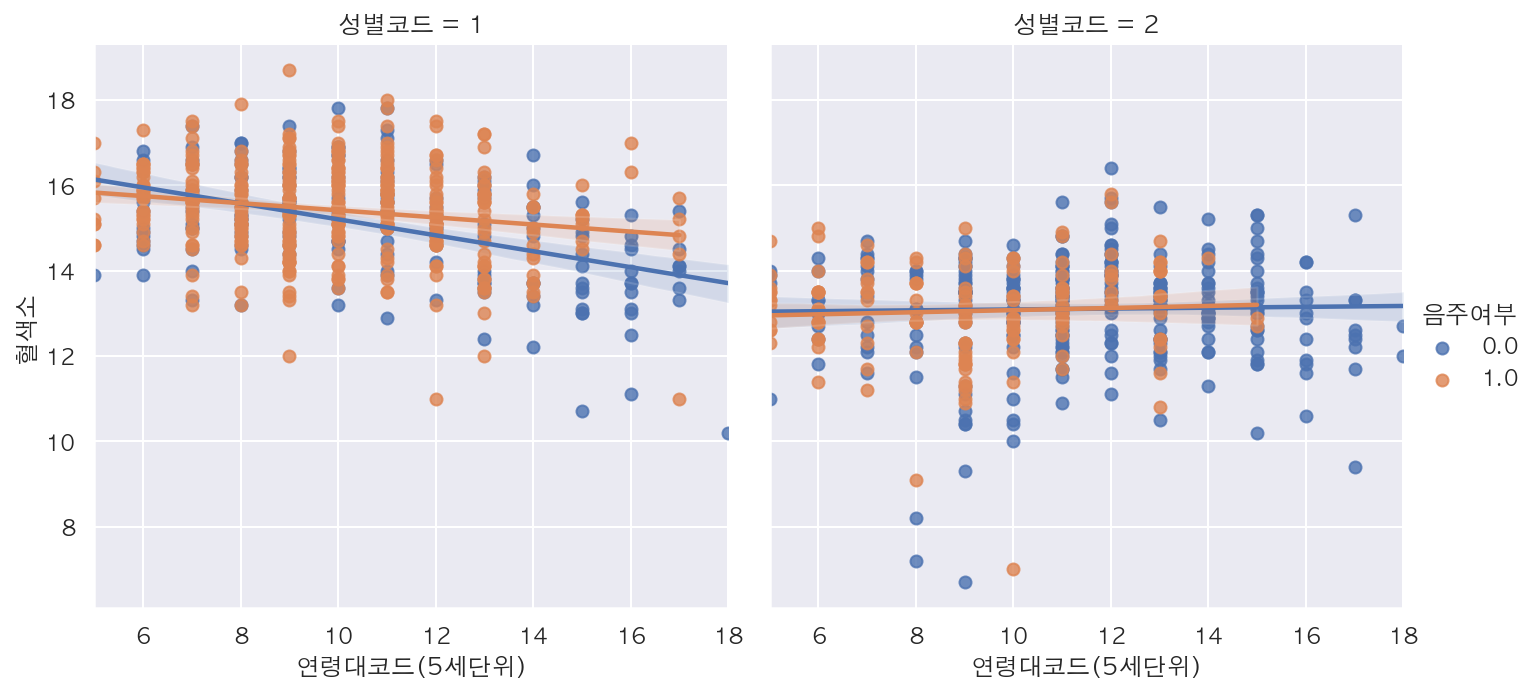

In [62]:
# lmplot
sns.lmplot(data = df_sample, x = '연령대코드(5세단위)', y = '혈색소', hue = '음주여부', col = '성별코드')

# col을 사용해서 나눌 수 있음 -> 많은 기준이로 한번에 표 표현 가능.
# 회귀선 - x/y 상관관계 알 수 있음

### 4-10

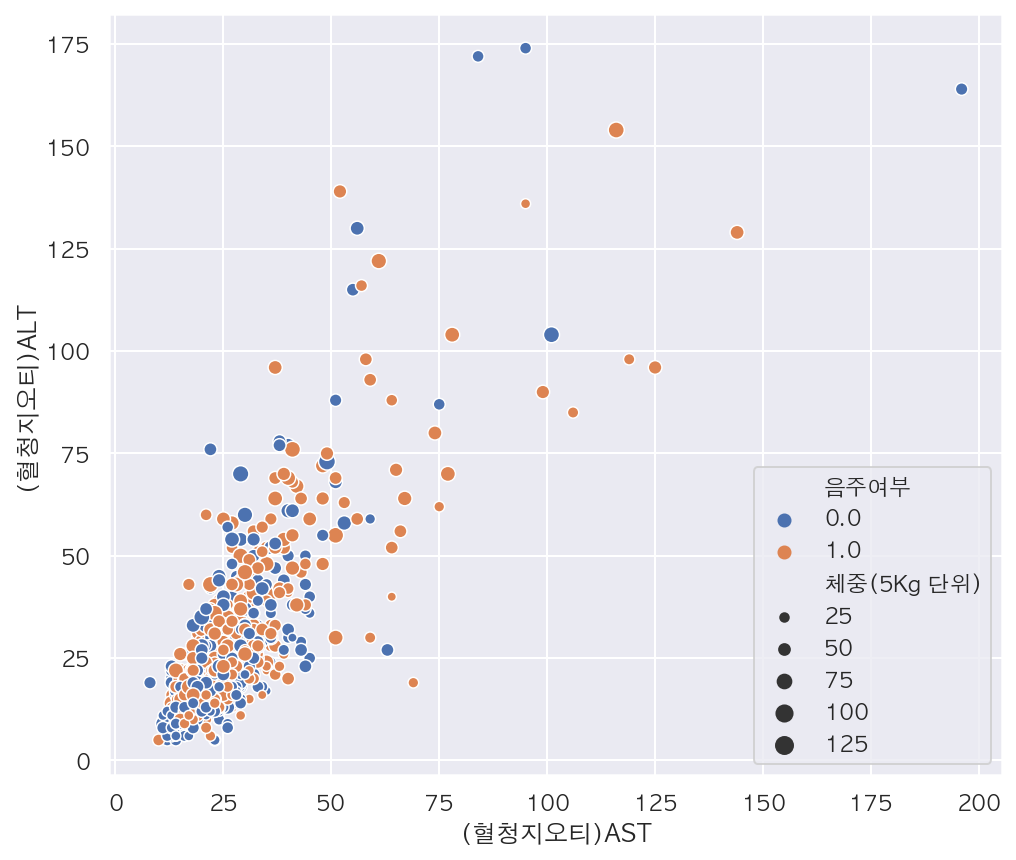

In [63]:
# 수치형 data
# scatterplot 산점도

plt.figure(figsize = (8, 7))
sns.scatterplot(data = df_sample, x = '(혈청지오티)AST', y = '(혈청지오티)ALT', hue = '음주여부'
               , size = '체중(5Kg 단위)')

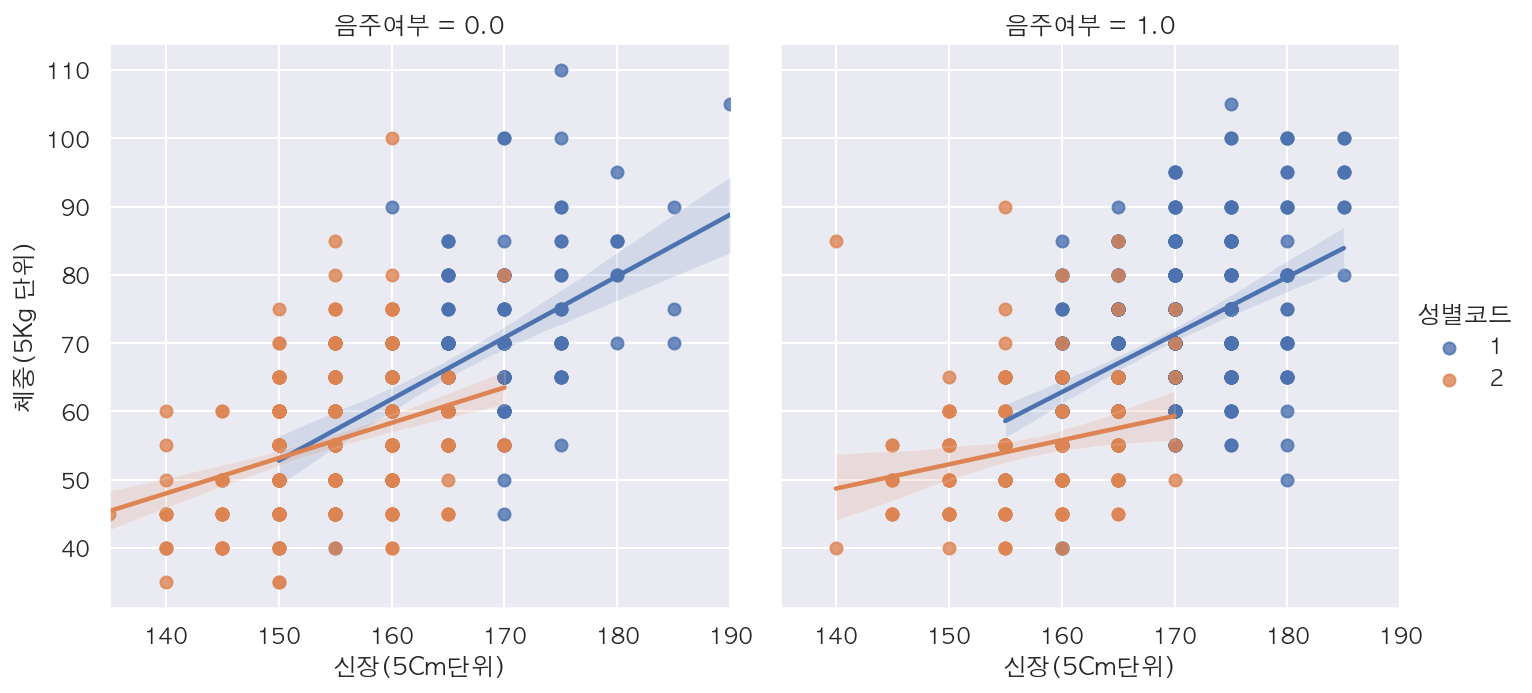

In [64]:
sns.lmplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '성별코드', col = '음주여부')
# 회귀선 - 그래프 상관관계

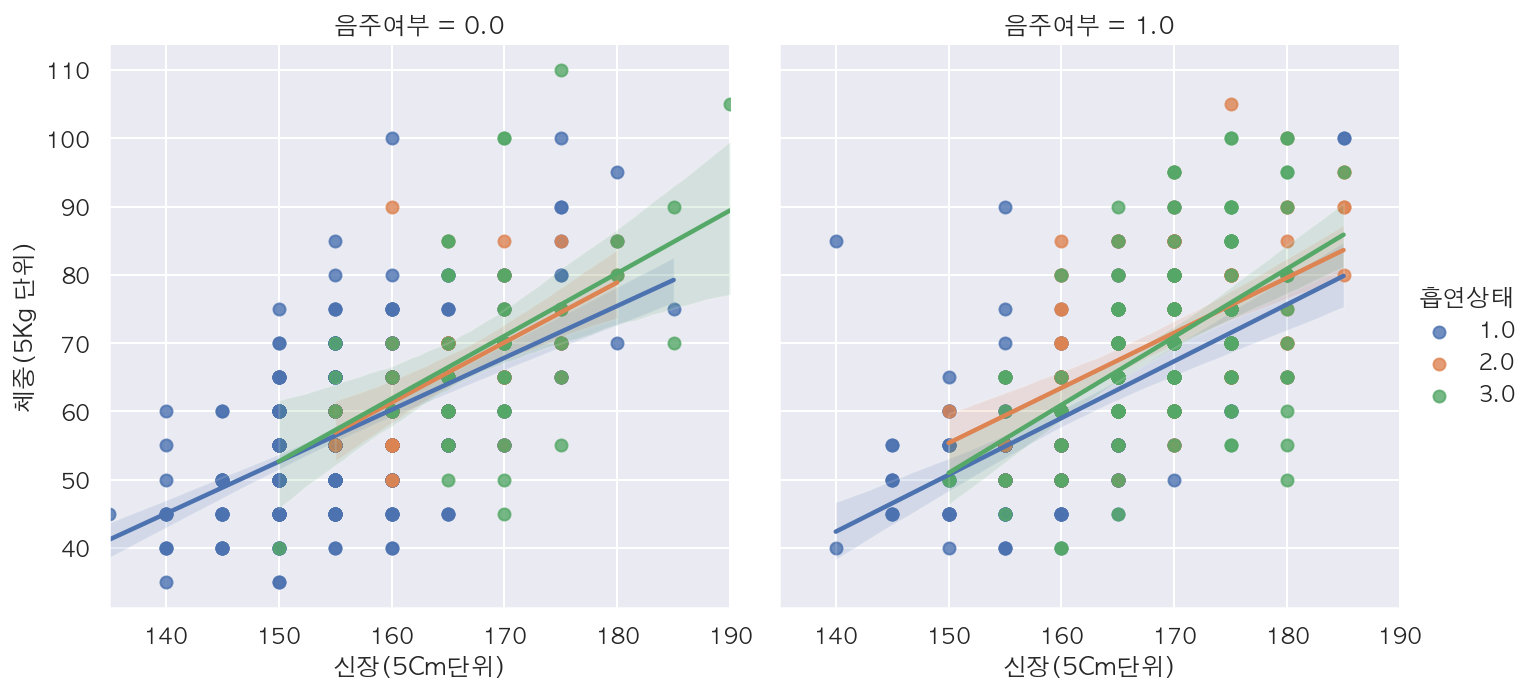

In [65]:
sns.lmplot(data = df_sample, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '흡연상태', col = '음주여부')

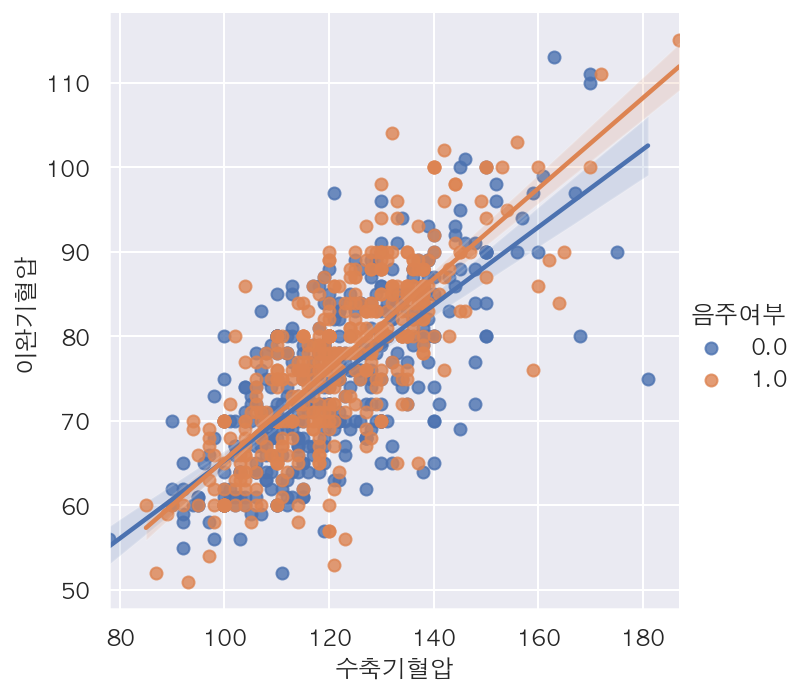

In [66]:
sns.lmplot(data = df_sample, x = '수축기혈압', y = '이완기혈압', hue = '음주여부')

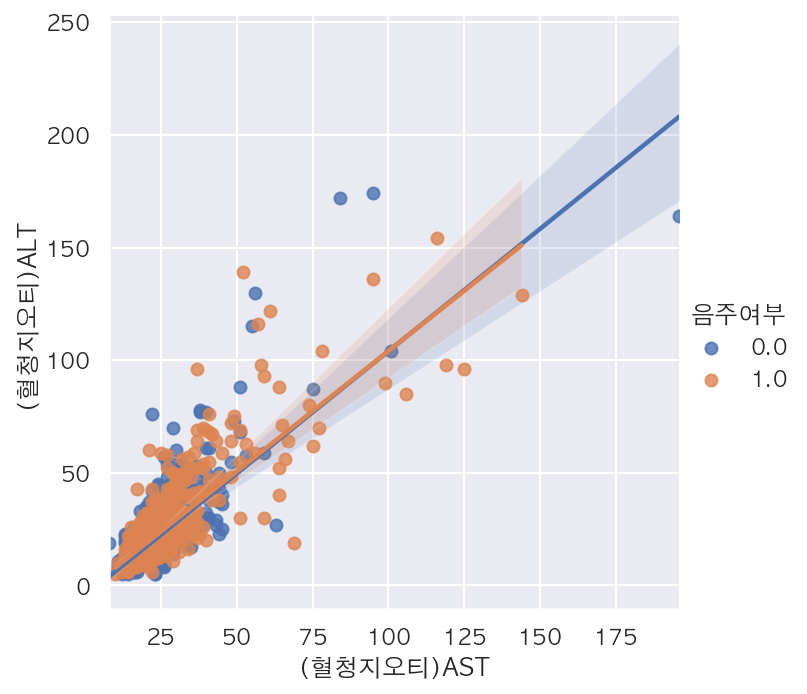

In [67]:
sns.lmplot(data = df_sample, x = '(혈청지오티)AST', y = '(혈청지오티)ALT', hue = '음주여부'
          , robust = True)
# robust -> 시간 오래걸림 / 이상치값 덜 영향


In [68]:
# 이상치 제거한 데이터
df_ASLT = df_sample[(df_sample['(혈청지오티)AST'] < 400) & (df_sample['(혈청지오티)ALT'] < 400)]

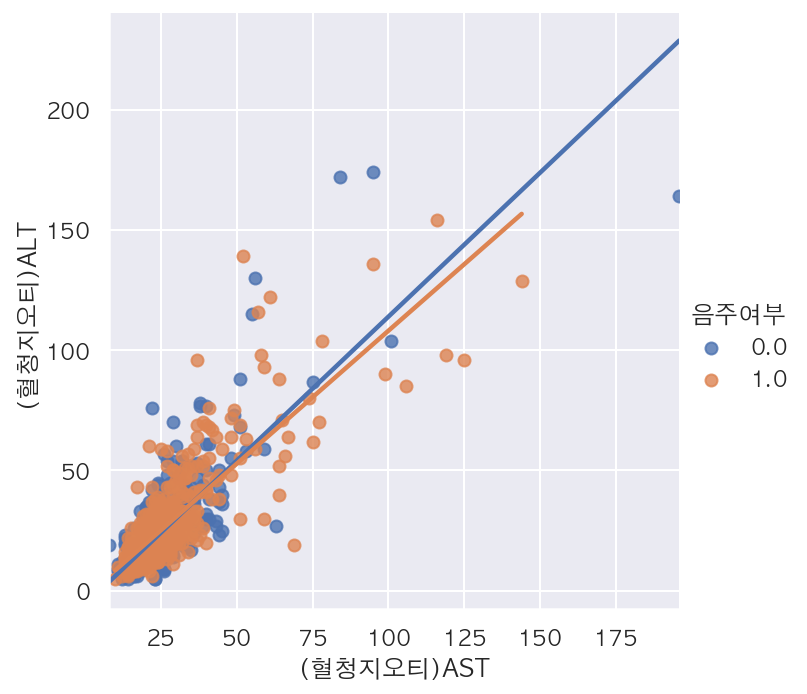

In [69]:
sns.lmplot(data = df_ASLT, x = '(혈청지오티)AST', y = '(혈청지오티)ALT', hue = '음주여부'
          , ci = None)

In [70]:
df_ASLT_high = df[(df['(혈청지오티)AST'] > 400) | (df['(혈청지오티)ALT'] > 400)]
# 역으로 이상치만 고려도 가능
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high['(혈청지오티)AST'] > 8000]
df_ASLT_high_8000

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg 단위)  허리둘레  \
677177  2017   677178     1           17    41      155.0        55.0  81.0   
887237  2017   887238     1            5    41      160.0        55.0  71.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진 수검여부  치아우식증유무  결손치유무  \
677177    0.2    0.9  ...  888.0   1.0   1.0          0      NaN    NaN   
887237    1.2    1.0  ...  379.0   3.0   1.0          0      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상  치석   데이터공개일자  
677177      NaN           NaN NaN  20181126  
887237      NaN           NaN NaN  20181126  

[2 rows x 34 columns]

### 4-11

In [71]:
# distplot - 히스토그램 + 확률밀도함수

df.columns # 전부 수치형 / (5세/5kg) -> 범주형으로 볼 수도.

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

In [74]:
df_chol = df.loc[df['총콜레스테롤'].notnull(), '총콜레스테롤'] # distplot은 NaN값 처리 X

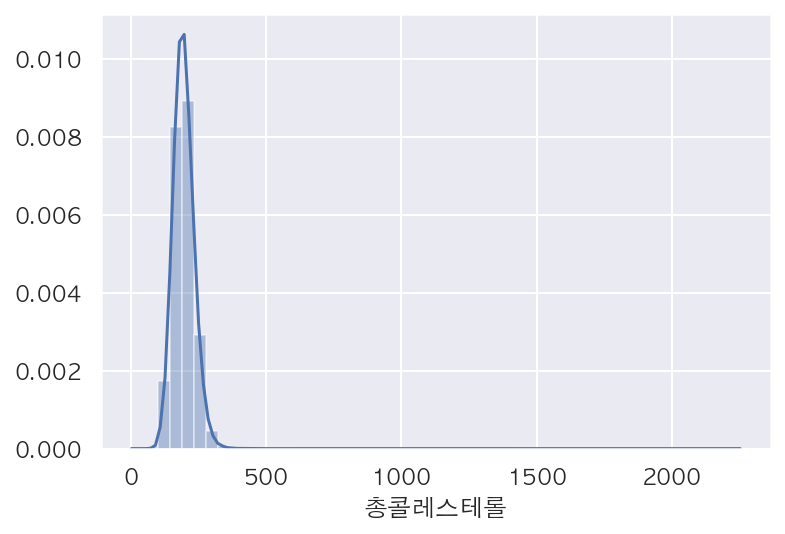

In [75]:
sns.distplot(df_chol)

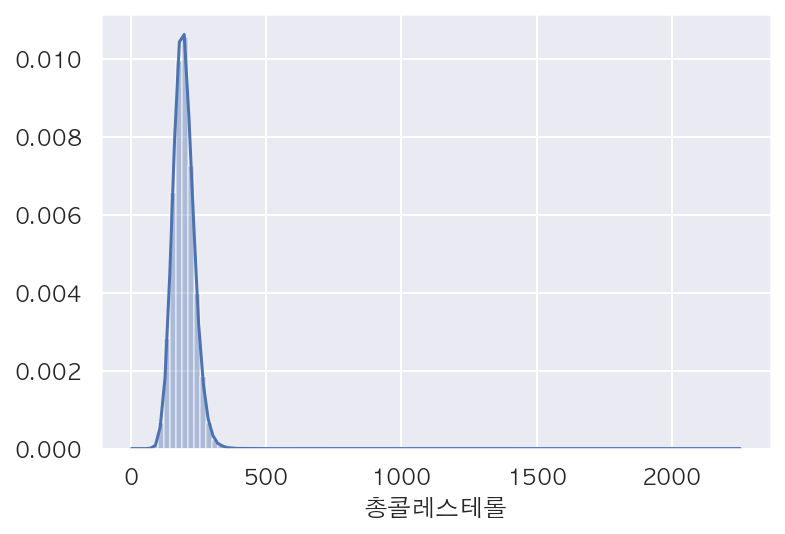

In [76]:
sns.distplot(df_chol, bins = 100) # bins 클 수록 촘촘하게

In [78]:
df_chol.describe()

count    999957.000000
mean        195.515105
std          38.937646
min          10.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2245.000000
Name: 총콜레스테롤, dtype: float64

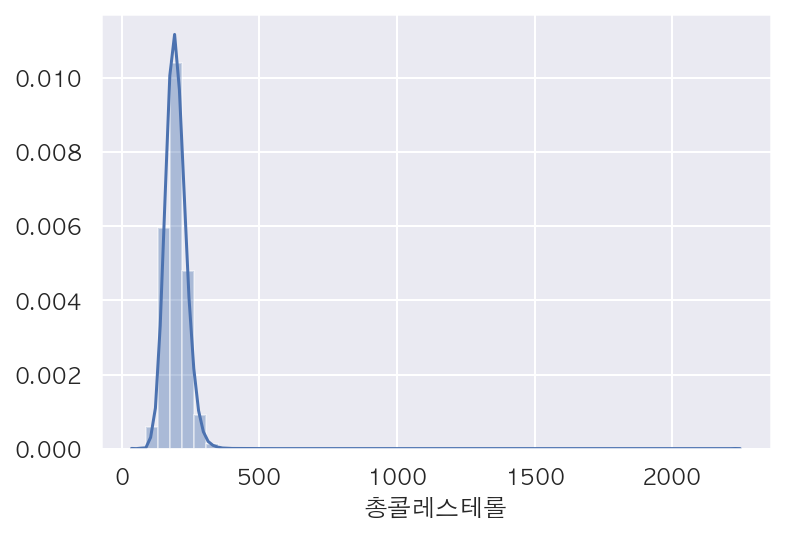

In [82]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1)
                    , '총콜레스테롤'])

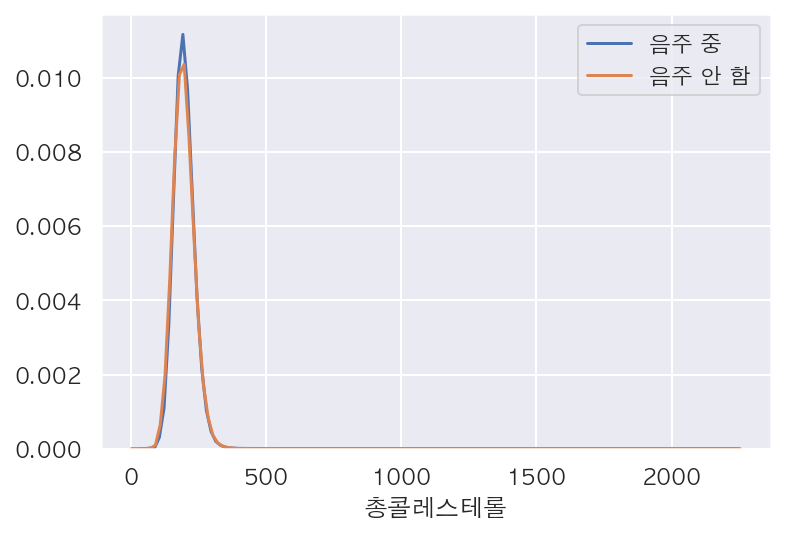

In [85]:
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1)
                    , '총콜레스테롤'], hist = False, label = '음주 중')
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0)
                    , '총콜레스테롤'], label = '음주 안 함')

# 음주여부에 따라 같은 그래프에
# hist = False / kdeplot -> 히스토그램 제외함.

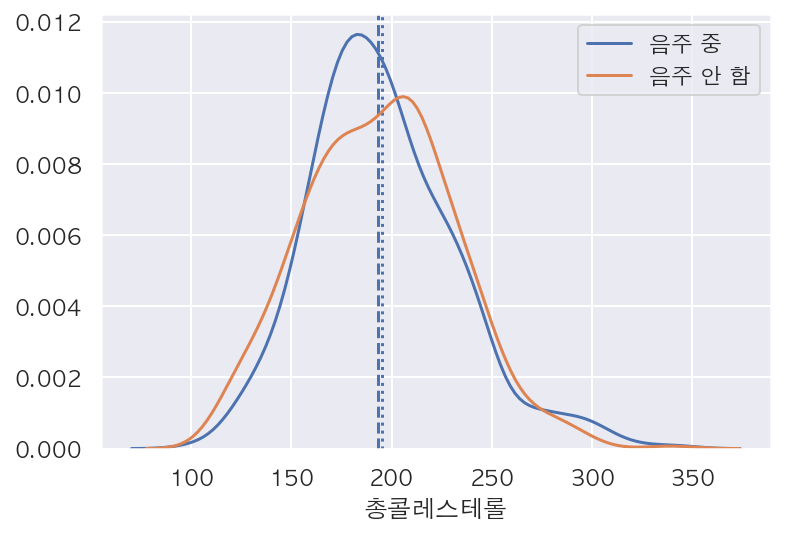

In [90]:
plt.axvline(df_sample['총콜레스테롤'].mean(), linestyle = ':') # 그래프에 평균값 표시
plt.axvline(df_sample['총콜레스테롤'].median(), linestyle = '--') # 그래프에 중앙값 표시

sns.distplot(df_sample.loc[df_sample['총콜레스테롤'].notnull() & (df_sample['음주여부'] == 1)
                    , '총콜레스테롤'], hist = False, label = '음주 중')
sns.kdeplot(df_sample.loc[df_sample['총콜레스테롤'].notnull() & (df_sample['음주여부'] == 0)
                    , '총콜레스테롤'], label = '음주 안 함')

### 4-12

In [92]:
# 상관분석 / 두 변수간의 연관 정도 나타냄 / (인과관계 X)

columns = ['연령대코드(5세단위)', '신장(5Cm단위)','체중(5Kg 단위)', '허리둘레', 
           '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', 
           '수축기혈압','이완기혈압', '식전혈당(공복혈당)', 
           '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', 
           '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태','음주여부']
columns
      

['연령대코드(5세단위)',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [96]:
df_small = df_sample[columns]
df_corr = df_small.corr() # 상관계수 default = (피어슨)
df_corr

연령대코드(5세단위)  신장(5Cm단위)  체중(5Kg 단위)      허리둘레     시력(좌)     시력(우)  \
연령대코드(5세단위)     1.000000  -0.397412   -0.210610  0.134720 -0.201947 -0.203802   
신장(5Cm단위)      -0.397412   1.000000    0.648489  0.293774  0.141800  0.156605   
체중(5Kg 단위)     -0.210610   0.648489    1.000000  0.790520  0.076534  0.133502   
허리둘레            0.134720   0.293774    0.790520  1.000000 -0.033007  0.034518   
시력(좌)          -0.201947   0.141800    0.076534 -0.033007  1.000000  0.462877   
시력(우)          -0.203802   0.156605    0.133502  0.034518  0.462877  1.000000   
청력(좌)           0.193769  -0.100178   -0.038100  0.048379 -0.049368 -0.041439   
청력(우)           0.253585  -0.121083   -0.070590  0.052245 -0.084603 -0.096255   
수축기혈압           0.296807   0.030012    0.244673  0.333025 -0.010112 -0.020638   
이완기혈압           0.149758   0.118103    0.287084  0.302398 -0.001695  0.012802   
식전혈당(공복혈당)      0.166079   0.059881    0.155556  0.219585 -0.075272  0.006790   
총콜레스테롤          0.005873  -0.013813    0.082305  0.081332  0.005267  0.038706   
트리글리세라이드        0.033434   0.113687    0.238945  0.288572  0.029648  0.018477   
HDL콜레스테롤       -0.121635  -0.152505   -0.357603 -0.409940  0.021295 -0.030666   
LDL콜레스테롤        0.023206  -0.003485    0.106049  0.098301 -0.015221  0.044949   
혈색소            -0.165788   0.529475    0.508366  0.377023  0.073866  0.056753   
요단백            -0.022885   0.014089    0.028840 -0.002252  0.010995  0.009548   
혈청크레아티닌         0.020587   0.243101    0.190769  0.149351  0.018104  0.031835   
(혈청지오티)AST      0.106376   0.035321    0.196722  0.229202  0.003379  0.024706   
(혈청지오티)ALT     -0.014101   0.187945    0.372930  0.357288  0.029429  0.083163   
감마지티피           0.052946   0.171372    0.254150  0.271566  0.011519  0.045560   
흡연상태           -0.136350   0.505945    0.397230  0.268685  0.063964  0.054681   
음주여부           -0.277149   0.362905    0.235974  0.084514  0.073696  0.063220   

                청력(좌)     청력(우)     수축기혈압     이완기혈압  ...  HDL콜레스테롤  LDL콜레스테롤  \
연령대코드(5세단위)  0.193769  0.253585  0.296807  0.149758  ... -0.121635  0.023206   
신장(5Cm단위)   -0.100178 -0.121083  0.030012  0.118103  ... -0.152505 -0.003485   
체중(5Kg 단위)  -0.038100 -0.070590  0.244673  0.287084  ... -0.357603  0.106049   
허리둘레         0.048379  0.052245  0.333025  0.302398  ... -0.409940  0.098301   
시력(좌)       -0.049368 -0.084603 -0.010112 -0.001695  ...  0.021295 -0.015221   
시력(우)       -0.041439 -0.096255 -0.020638  0.012802  ... -0.030666  0.044949   
청력(좌)        1.000000  0.512849  0.105602  0.034535  ... -0.015340 -0.018551   
청력(우)        0.512849  1.000000  0.127883  0.041907  ... -0.078820 -0.059298   
수축기혈압        0.105602  0.127883  1.000000  0.744132  ... -0.138843  0.003982   
이완기혈압        0.034535  0.041907  0.744132  1.000000  ... -0.090783  0.045014   
식전혈당(공복혈당)  -0.000567  0.035457  0.168399  0.134820  ... -0.136568 -0.038186   
총콜레스테롤      -0.034960 -0.095937  0.047920  0.097394  ...  0.137891  0.880425   
트리글리세라이드    -0.029229 -0.027957  0.187875  0.166679  ... -0.383788  0.011516   
HDL콜레스테롤    -0.015340 -0.078820 -0.138843 -0.090783  ...  1.000000 -0.062431   
LDL콜레스테롤    -0.018551 -0.059298  0.003982  0.045014  ... -0.062431  1.000000   
혈색소         -0.015990 -0.031084  0.143038  0.219912  ... -0.208488  0.112034   
요단백         -0.026771 -0.013656  0.016896  0.021567  ... -0.005009 -0.004715   
혈청크레아티닌     -0.026352 -0.030057  0.090268  0.131162  ... -0.142140  0.037578   
(혈청지오티)AST   0.014587  0.002233  0.143089  0.159043  ... -0.031833  0.011017   
(혈청지오티)ALT   0.003031 -0.023672  0.118240  0.154490  ... -0.179211  0.075795   
감마지티피       -0.006351  0.005842  0.176208  0.204673  ... -0.121648  0.046815   
흡연상태        -0.034204 -0.040937  0.108511  0.144251  ... -0.188906 -0.011593   
음주여부        -0.037669 -0.032475  0.032543  0.110143  ...  0.052452 -0.046947   

                  혈색소       요단백   혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT     감마지티피  \
연령대코드(5세단위) -0.165788 -0.022885  0.020587    0.106376   -0.014101  0

In [99]:
df_corr['신장(5Cm단위)'].sort_values() # 특정 col의 상관계수

연령대코드(5세단위)   -0.397412
HDL콜레스테롤      -0.152505
청력(우)         -0.121083
청력(좌)         -0.100178
총콜레스테롤        -0.013813
LDL콜레스테롤      -0.003485
요단백            0.014089
수축기혈압          0.030012
(혈청지오티)AST     0.035321
식전혈당(공복혈당)     0.059881
트리글리세라이드       0.113687
이완기혈압          0.118103
시력(좌)          0.141800
시력(우)          0.156605
감마지티피          0.171372
(혈청지오티)ALT     0.187945
혈청크레아티닌        0.243101
허리둘레           0.293774
음주여부           0.362905
흡연상태           0.505945
혈색소            0.529475
체중(5Kg 단위)     0.648489
신장(5Cm단위)      1.000000
Name: 신장(5Cm단위), dtype: float64

In [105]:
df_corr.loc[df_corr['신장(5Cm단위)'] > 0.3, '신장(5Cm단위)'] # 특정 col의 특정 조건 상관계수

신장(5Cm단위)     1.000000
체중(5Kg 단위)    0.648489
혈색소           0.529475
흡연상태          0.505945
음주여부          0.362905
Name: 신장(5Cm단위), dtype: float64

In [108]:
df_corr.loc[df_corr['음주여부']>0.25, '음주여부'] # 특정 col의 특정 조건 상관계수

신장(5Cm단위)    0.362905
혈색소          0.291863
감마지티피        0.250011
흡연상태         0.365642
음주여부         1.000000
Name: 음주여부, dtype: float64

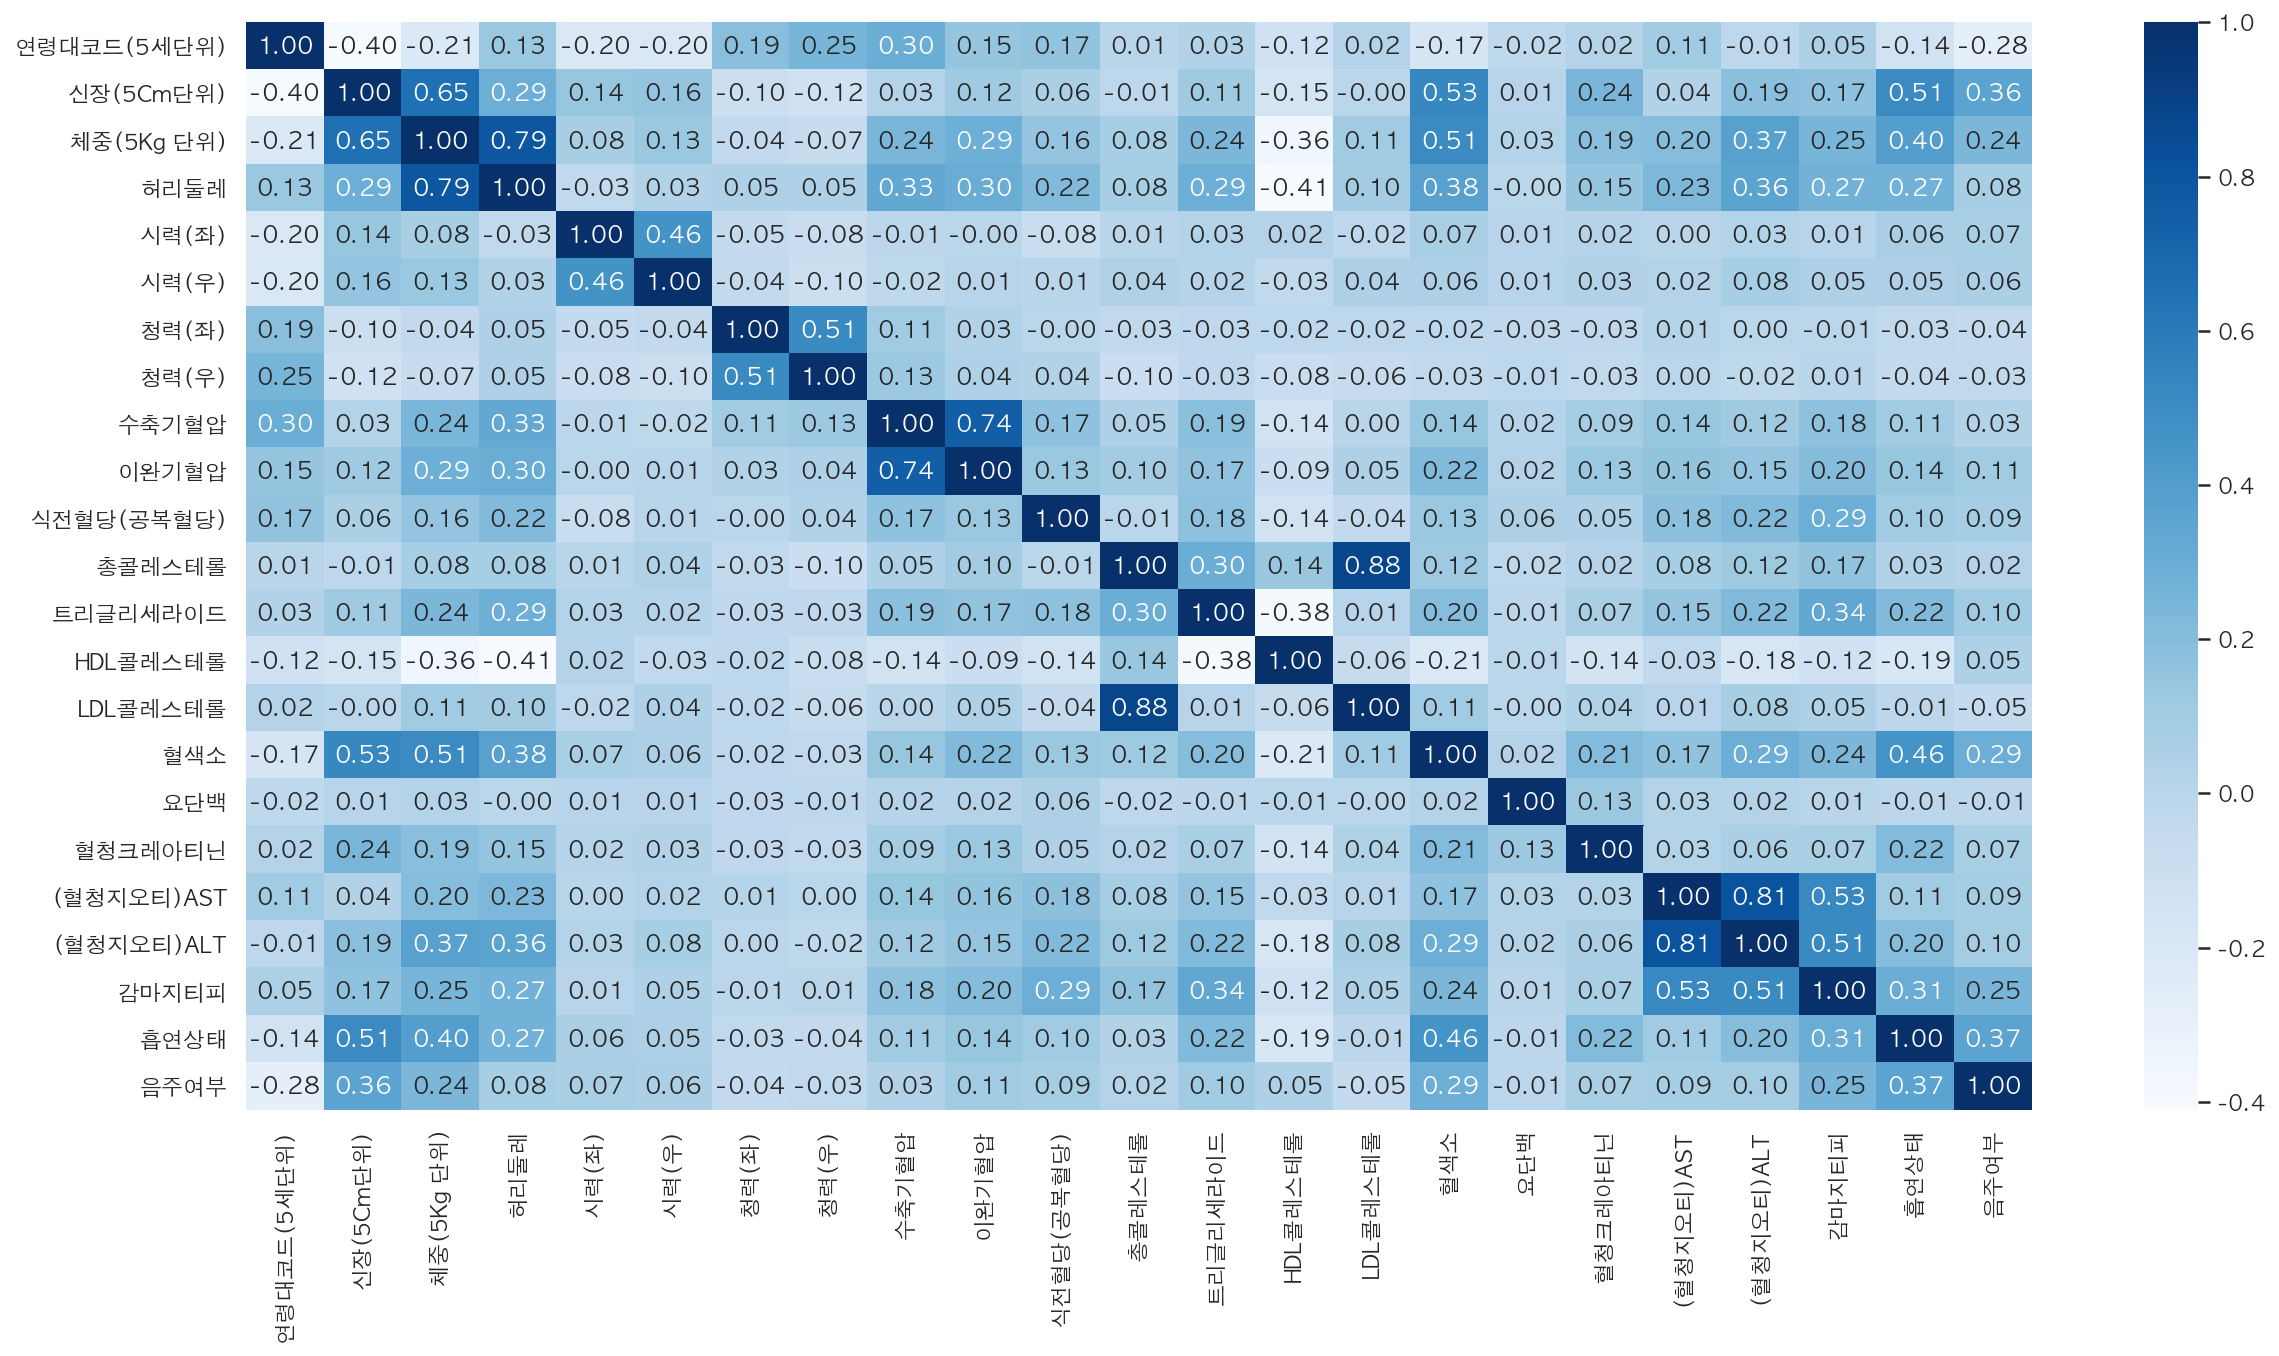

In [126]:
# heatmap 상관계수 한번에

plt.figure(figsize = (20, 10))
sns.heatmap(data = df_corr, annot = True, fmt = '.2f', cmap = 'Blues') 
# annot = 상관계수 출력 / fmt = 계수 소수점 제한

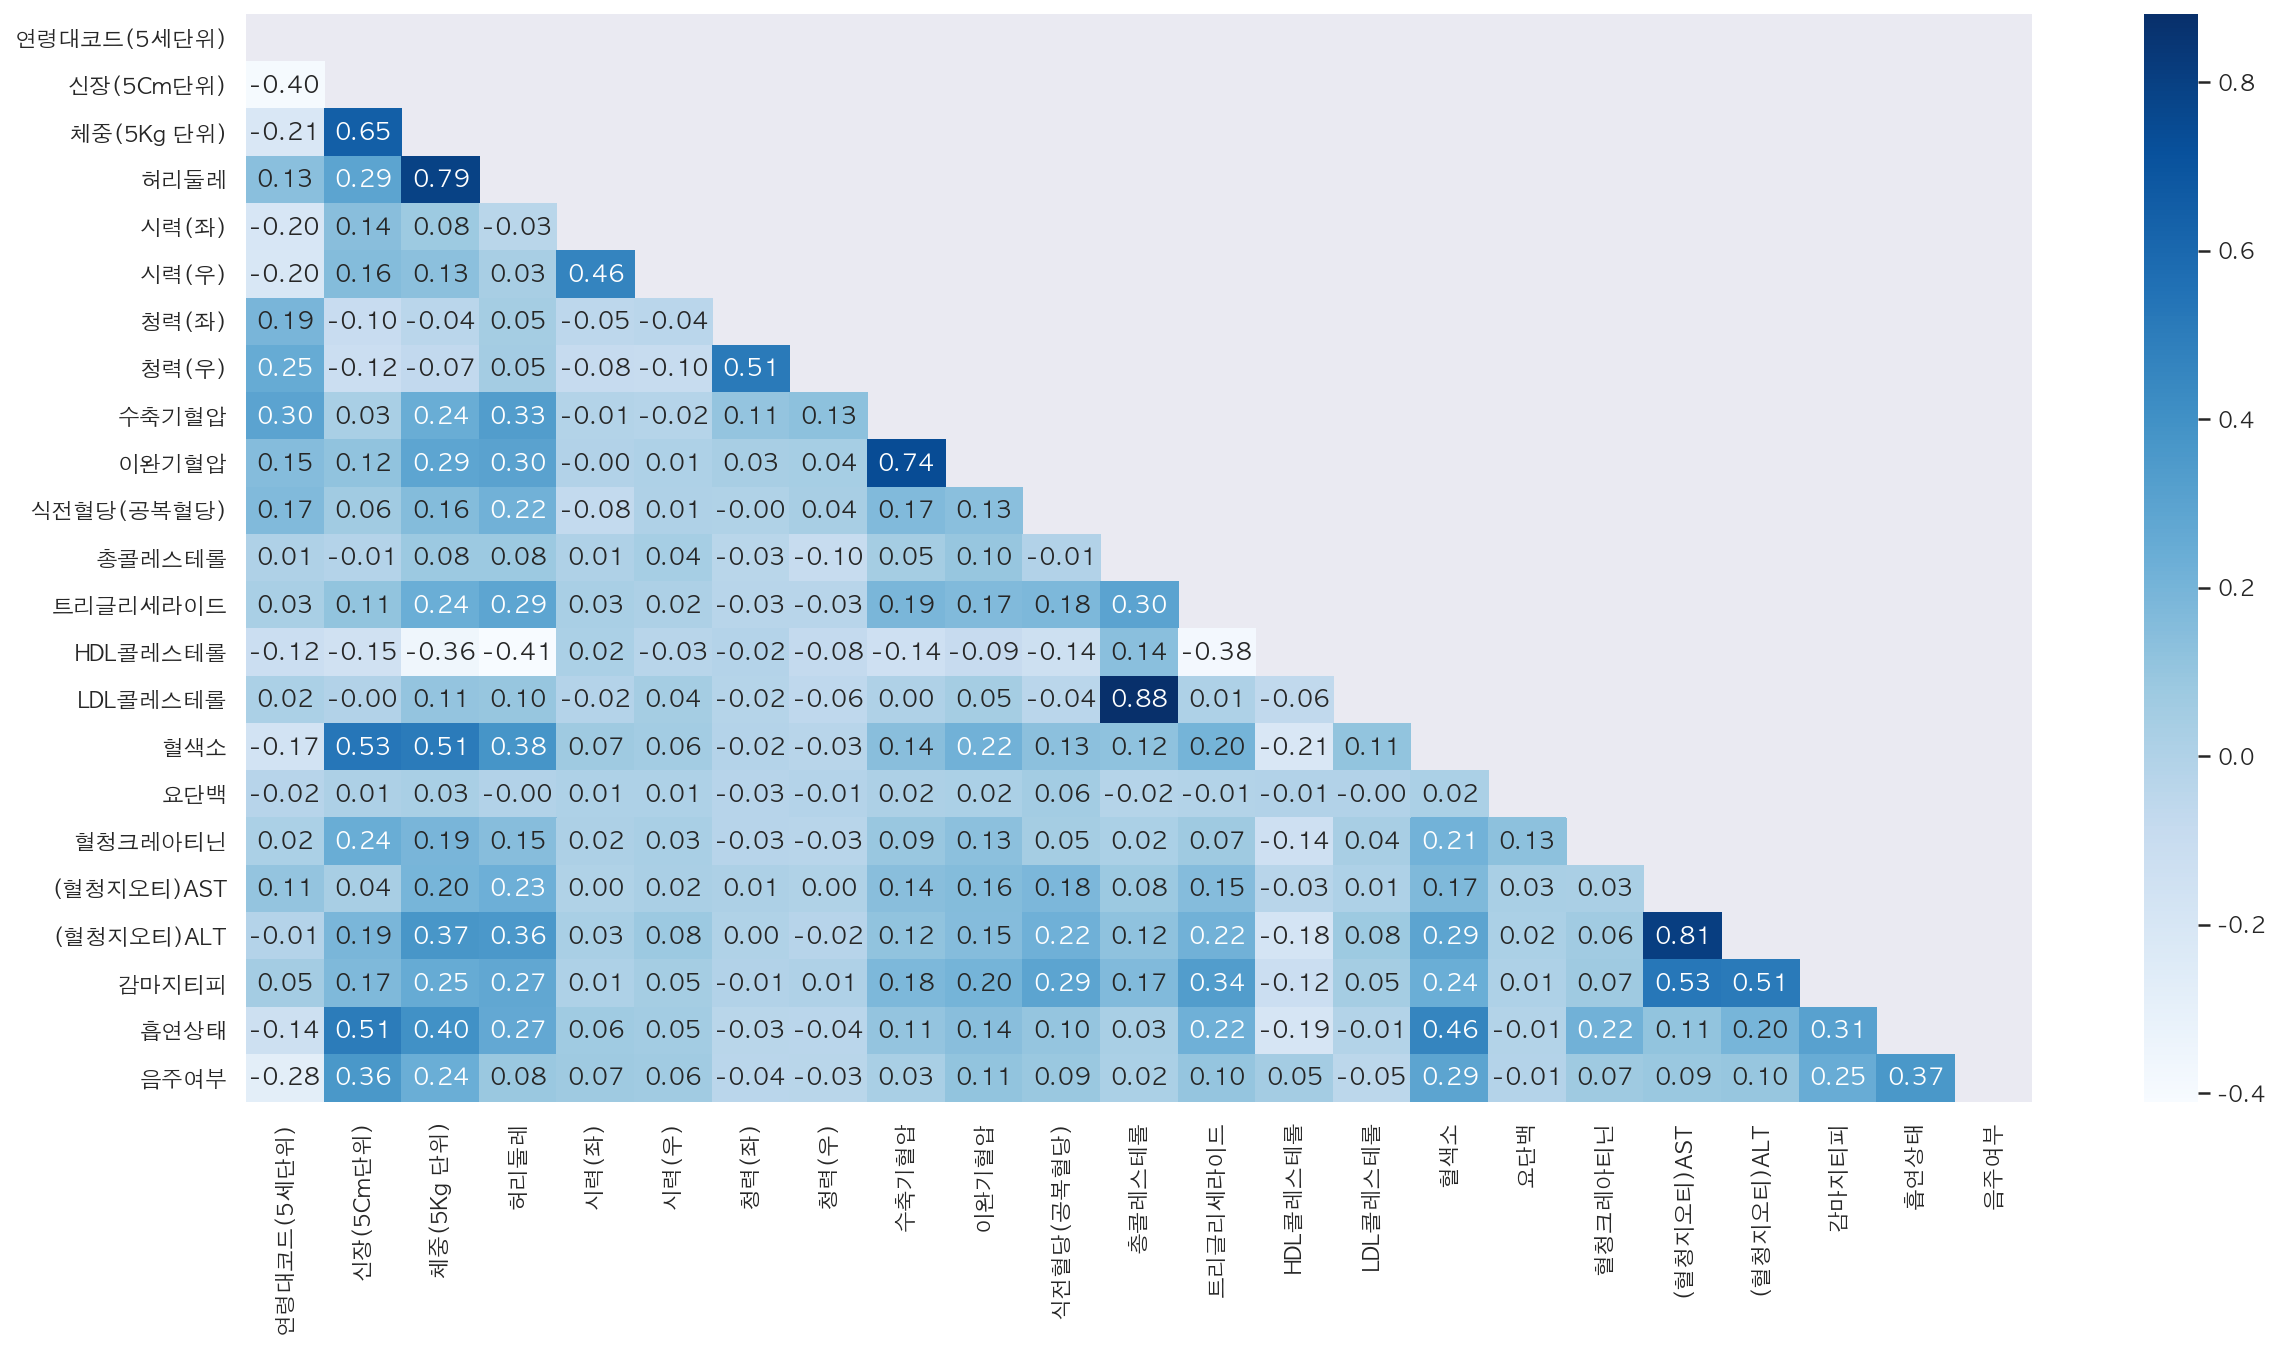

In [123]:
mask = np.triu(np.ones_like(df_corr, dtype = np.bool))

plt.figure(figsize = (20, 10))
sns.heatmap(data = df_corr, annot = True, fmt = '.2f', cmap = 'Blues', mask = mask)

# mask = heatmap 중복값 제거 (대각선 위쪽)